保存路径已存在: C:\Users\flipp\Desktop\Dase导论\数据集
正在处理大项目: AdguardTeam
  正在处理小项目: AdguardFilters
正在处理大项目: airbytehq
  正在处理小项目: airbyte
正在处理大项目: alibaba
  正在处理小项目: nacos
正在处理大项目: angular
  正在处理小项目: angular
  正在处理小项目: components
正在处理大项目: ankidroid
  正在处理小项目: Anki-Android
正在处理大项目: ansible
  正在处理小项目: ansible
正在处理大项目: ant-design
  正在处理小项目: ant-design
正在处理大项目: apache
  正在处理小项目: airflow
  正在处理小项目: apisix
  正在处理小项目: arrow
  正在处理小项目: beam
  正在处理小项目: dolphinscheduler
  正在处理小项目: doris
  正在处理小项目: flink
  正在处理小项目: hudi
  正在处理小项目: iceberg
  正在处理小项目: pulsar
  正在处理小项目: shardingsphere
  正在处理小项目: spark
  正在处理小项目: superset
  正在处理小项目: tvm
正在处理大项目: apple
  正在处理小项目: swift
正在处理大项目: appsmithorg
  正在处理小项目: appsmith
正在处理大项目: archway-network
  正在处理小项目: testnets
正在处理大项目: ArduPilot
  正在处理小项目: ardupilot
正在处理大项目: argoproj
  正在处理小项目: argo-cd
正在处理大项目: AUTOMATIC1111
  正在处理小项目: stable-diffusion-webui
正在处理大项目: Automattic
  正在处理小项目: jetpack
  正在处理小项目: wp-calypso
正在处理大项目: aws
  正在处理小项目: aws-cdk
正在处理大项目: aws-amplify
  正在处理小项目: amp

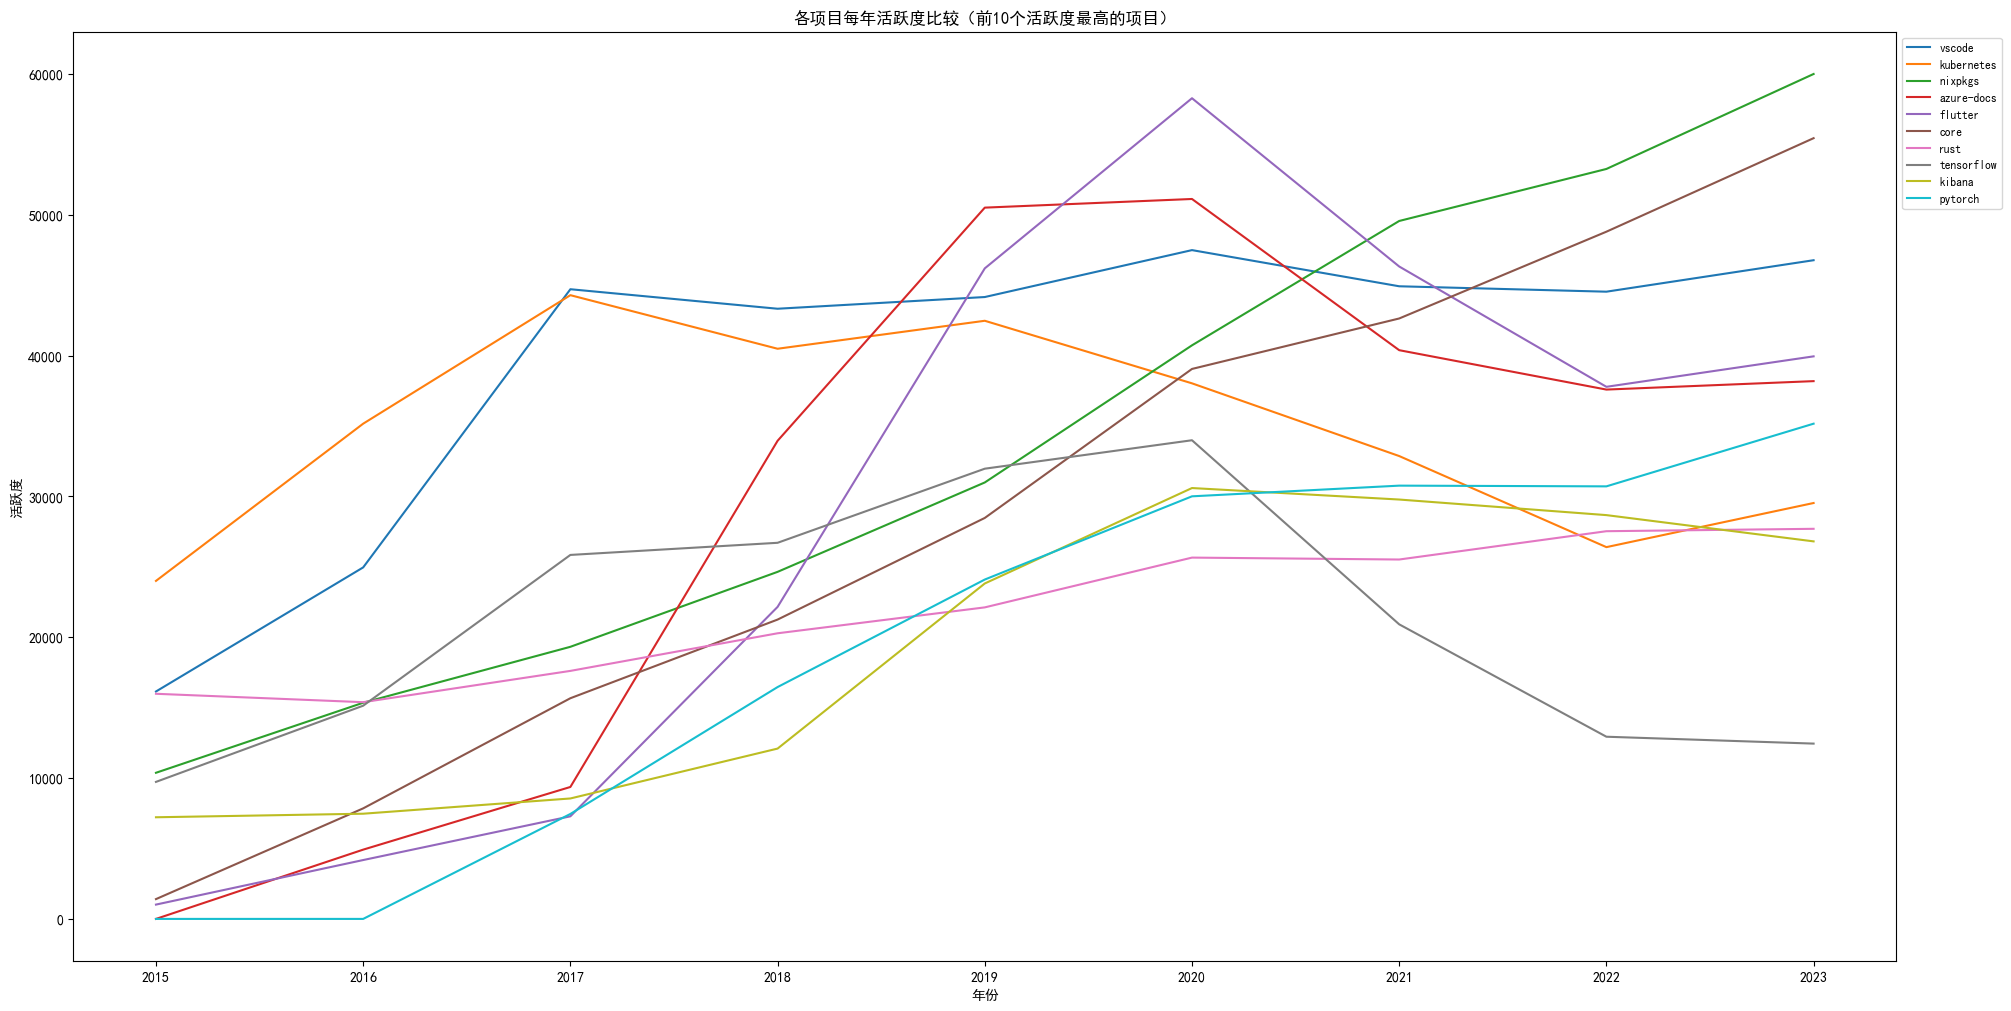


生成的文件列表：
activity_pivot.csv
activity_pivot_top10.csv
projects_activity_comparison_top10.png


In [13]:
#项目活跃度系数 指标一（activity.json得来）
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re

# 设置保存路径
save_path = r"C:\Users\flipp\Desktop\Dase导论\数据集"

# 如果目录不存在，创建它
if not os.path.exists(save_path):
    os.makedirs(save_path)
    print(f"已创建目录: {save_path}")
else:
    print(f"保存路径已存在: {save_path}")

# 全局设置中文字体
font_path = r'C:\Windows\Fonts\simhei.ttf'  # 更新为实际字体路径
if not os.path.exists(font_path):
    font_path = r'C:\Windows\Fonts\msyh.ttc'  # 备选字体路径
    if not os.path.exists(font_path):
        raise FileNotFoundError("未找到支持中文的字体文件 (simhei.ttf 或 msyh.ttc)。请确认字体路径是否正确。")

matplotlib.rcParams['font.family'] = 'SimHei'  # 或 'Microsoft YaHei'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 或 ['Microsoft YaHei']
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 定义递归查找 activity.json 的函数
def find_activity_json(project_path):
    """
    在给定的项目路径中递归搜索 activity.json 文件。
    如果找到多个，返回所有找到的文件路径列表。
    如果未找到，返回空列表。
    """
    activity_files = []
    for root, dirs, files in os.walk(project_path):
        if 'activity.json' in files:
            activity_files.append(os.path.join(root, 'activity.json'))
    return activity_files

# 主文件夹路径
main_folder = r"C:\Users\flipp\Desktop\top_300_metrics"

# 初始化一个空的DataFrame来存储所有项目的数据
all_projects_data = pd.DataFrame()

# 定义正则表达式匹配 'YYYY-MM' 格式
date_pattern = re.compile(r'^\d{4}-\d{2}$')

# 遍历主文件夹中的所有子文件夹（大项目）
for large_project_name in os.listdir(main_folder):
    large_project_path = os.path.join(main_folder, large_project_name)
    if os.path.isdir(large_project_path):
        print(f"正在处理大项目: {large_project_name}")

        # 查找所有 activity.json 文件
        activity_files = find_activity_json(large_project_path)
        if not activity_files:
            print(f"  在大项目 '{large_project_name}' 中未找到任何 activity.json 文件。")
            continue

        for activity_file in activity_files:
            # 获取小项目名称（假设小项目文件夹的名称是 activity.json 文件所在文件夹的名称）
            small_project_path = os.path.dirname(activity_file)
            small_project_name = os.path.basename(small_project_path)
            print(f"  正在处理小项目: {small_project_name}")

            with open(activity_file, 'r', encoding='utf-8') as f:
                try:
                    activity_data = json.load(f)
                    
                    # 假设 activity.json 中有一个包含月份活跃度的字典，键为 'YYYY-MM'
                    if isinstance(activity_data, dict):
                        df = pd.DataFrame(list(activity_data.items()), columns=['Date', 'Activity'])
                        df['Project'] = small_project_name
                        
                        # 过滤符合 'YYYY-MM' 格式的日期
                        df = df[df['Date'].apply(lambda x: bool(date_pattern.match(x)))]
                        
                        # 提取年份和月份
                        df['Year'] = pd.to_datetime(df['Date'], format='%Y-%m', errors='coerce').dt.year
                        df['Month'] = pd.to_datetime(df['Date'], format='%Y-%m', errors='coerce').dt.month
                        
                        # 删除无法解析为日期的行
                        df = df.dropna(subset=['Year', 'Month'])
                        
                        # 将 'Year' 和 'Month' 转换为整数
                        df['Year'] = df['Year'].astype(int)
                        df['Month'] = df['Month'].astype(int)
                        
                        # 确保 Activity 是数值类型
                        df['Activity'] = pd.to_numeric(df['Activity'], errors='coerce').fillna(0)
                        
                        # 按年份和项目分组，计算每年的总活跃度和活跃的月份数
                        yearly_activity = df.groupby(['Year', 'Project']).agg(
                            Activity_Sum=('Activity', 'sum'),
                            Active_Months=('Month', 'nunique')
                        ).reset_index()
                        
                        # 计算年度活跃度的标准化值（如果活跃月份少于12个月，则标准化）
                        yearly_activity['Activity_Standardized'] = yearly_activity.apply(
                            lambda row: row['Activity_Sum'] * (12 / row['Active_Months']) if row['Active_Months'] < 12 else row['Activity_Sum'],
                            axis=1
                        )
                        
                        # 选择需要的列
                        yearly_activity = yearly_activity[['Year', 'Project', 'Activity_Standardized']]
                        yearly_activity.rename(columns={'Activity_Standardized': 'Activity'}, inplace=True)
                        
                        # 合并到总数据中
                        all_projects_data = pd.concat([all_projects_data, yearly_activity], ignore_index=True)
                    else:
                        print(f"  {activity_file} 的JSON结构不是字典，跳过。")
                except json.JSONDecodeError:
                    print(f"  无法解码 {activity_file}，可能不是有效的JSON文件。")

# 检查是否有数据
if all_projects_data.empty:
    print("没有找到任何活动数据。")
else:
    # 透视表，将年份作为x轴，项目作为不同的系列
    pivot_df = all_projects_data.pivot_table(index='Year', columns='Project', values='Activity', fill_value=0)
    
    # 保存透视后的数据到 CSV
    pivot_csv = os.path.join(save_path, 'activity_pivot.csv')
    pivot_df.to_csv(pivot_csv, encoding='utf-8-sig')
    print(f"透视后的数据已保存到 '{pivot_csv}'。")
    
    # 选择前10个活跃度最高的项目（按总活跃度排序）
    top_projects = pivot_df.sum().sort_values(ascending=False).head(10).index
    pivot_df_top = pivot_df[top_projects]
    
    # 保存筛选后的透视数据到 CSV
    pivot_top_csv = os.path.join(save_path, 'activity_pivot_top10.csv')
    pivot_df_top.to_csv(pivot_top_csv, encoding='utf-8-sig')
    print(f"前10个活跃度最高项目的透视数据已保存到 '{pivot_top_csv}'。")
    
    # 绘制折线图
    plt.figure(figsize=(20, 10), constrained_layout=True)  # 增大图表尺寸并使用 constrained_layout
    for project in pivot_df_top.columns:
        plt.plot(pivot_df_top.index, pivot_df_top[project], label=project)
    
    plt.xlabel('年份')
    plt.ylabel('活跃度')
    plt.title('各项目每年活跃度比较（前10个活跃度最高的项目）')
    
    # 调整图例
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')  # 缩小字体并调整位置
    
    # 保存折线图（如果需要）
    plot_image_path = os.path.join(save_path, 'projects_activity_comparison_top10.png')
    plt.savefig(plot_image_path, dpi=300, bbox_inches='tight')
    print(f"折线图已保存为 '{plot_image_path}'。")
    
    plt.show()
    
    # 列出保存的文件
    print("\n生成的文件列表：")
    for file in os.listdir(save_path):
        print(file)


保存路径已存在: C:\Users\flipp\Desktop\Dase导论\数据集

正在处理大项目: AdguardTeam
  正在处理小项目: AdguardFilters

正在处理大项目: airbytehq
  正在处理小项目: airbyte

正在处理大项目: alibaba
  正在处理小项目: nacos

正在处理大项目: angular
  正在处理小项目: angular
  正在处理小项目: components

正在处理大项目: ankidroid
  正在处理小项目: Anki-Android

正在处理大项目: ansible
  正在处理小项目: ansible

正在处理大项目: ant-design
  正在处理小项目: ant-design

正在处理大项目: apache
  正在处理小项目: airflow
  正在处理小项目: apisix
  正在处理小项目: arrow
  正在处理小项目: beam
  正在处理小项目: dolphinscheduler
  正在处理小项目: doris
  正在处理小项目: flink
  正在处理小项目: hudi
  正在处理小项目: iceberg
  正在处理小项目: pulsar
  正在处理小项目: shardingsphere
  正在处理小项目: spark
  正在处理小项目: superset
  正在处理小项目: tvm

正在处理大项目: apple
  正在处理小项目: swift

正在处理大项目: appsmithorg
  正在处理小项目: appsmith

正在处理大项目: archway-network
  正在处理小项目: testnets

正在处理大项目: ArduPilot
  正在处理小项目: ardupilot

正在处理大项目: argoproj
  正在处理小项目: argo-cd

正在处理大项目: AUTOMATIC1111
  正在处理小项目: stable-diffusion-webui

正在处理大项目: Automattic
  正在处理小项目: jetpack
  正在处理小项目: wp-calypso

正在处理大项目: aws
  正在处理小项目: aws-cdk

正在处理大项目: aws-ampli

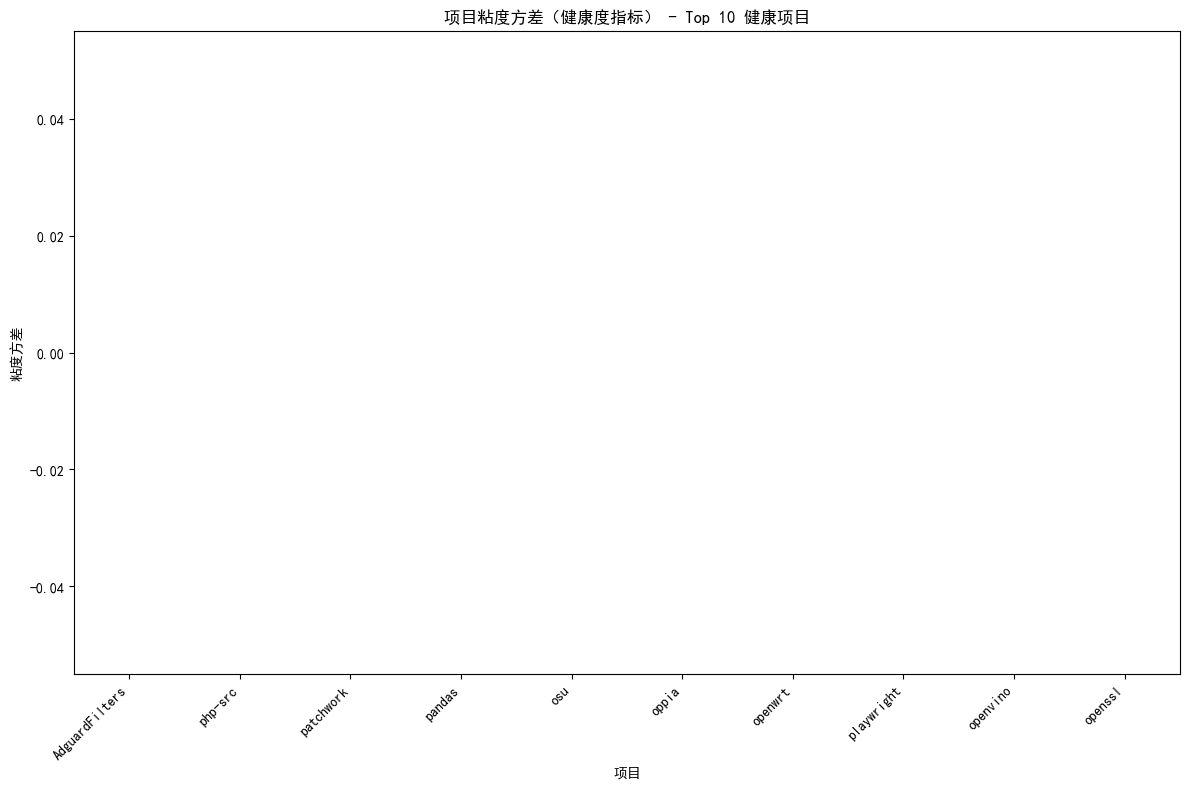


生成的文件列表：
activity_pivot.csv
activity_pivot_top10.csv
projects_activity_comparison_top10.png
stickiness_pivot.csv
stickiness_variance.csv
stickiness_variance_top10.png

总项目个数: 295


In [14]:
#项目活跃度系数 指标二（activity.json和active_dates_and_times.json得来）
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 设置保存路径
save_path = r"C:\Users\flipp\Desktop\Dase导论\数据集"

# 如果目录不存在，创建它
if not os.path.exists(save_path):
    os.makedirs(save_path)
    print(f"已创建目录: {save_path}")
else:
    print(f"保存路径已存在: {save_path}")

# 全局设置中文字体
font_path = r'C:\Windows\Fonts\simhei.ttf'  # 更新为实际字体路径
if not os.path.exists(font_path):
    font_path = r'C:\Windows\Fonts\msyh.ttc'  # 备选字体路径
    if not os.path.exists(font_path):
        raise FileNotFoundError("未找到支持中文的字体文件 (simhei.ttf 或 msyh.ttc)。请确认字体路径是否正确。")

matplotlib.rcParams['font.family'] = 'SimHei'  # 或 'Microsoft YaHei'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 或 ['Microsoft YaHei']
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 定义递归查找 JSON 文件的函数
def find_json_file(project_path, filename):
    """
    在给定的项目路径中递归搜索指定的 JSON 文件。
    如果找到多个，返回第一个找到的文件路径。
    如果未找到，返回 None。
    """
    for root, dirs, files in os.walk(project_path):
        if filename in files:
            return os.path.join(root, filename)
    return None

# 主文件夹路径
main_folder = r"C:\Users\flipp\Desktop\top_300_metrics"

# 初始化 DataFrame 来存储所有项目的数据
all_projects_activity = pd.DataFrame()
all_projects_dau = pd.DataFrame()

# 初始化集合来跟踪所有项目名称
all_project_names = set()

# 定义正则表达式匹配 'YYYY-MM' 格式
date_pattern = re.compile(r'^\d{4}-\d{2}$')

# 定义函数计算 Stickiness
def calculate_stickiness(sum_avg_dau, sum_mau):
    if sum_mau == 0:
        return 0
    return (sum_avg_dau / sum_mau) * (12 / 365)

# 定义函数预测缺失月份的数据（平均填充）
def predict_missing_months(df, year, project, metric):
    """
    对于给定项目和年份，预测缺失月份的数据。
    使用简单的平均值填充缺失月份。
    """
    # 预期的月份数
    expected_months = 12

    # 现有的月份
    existing_months = df[(df['Year'] == year) & (df['Project'] == project)]['Month'].tolist()

    missing_months = sorted(list(set(range(1, 13)) - set(existing_months)))

    if not missing_months:
        return df

    # 计算现有数据的平均值
    mean_value = df[(df['Year'] == year) & (df['Project'] == project)][metric].mean()

    # 使用平均值填充缺失月份
    for month in missing_months:
        new_row = {'Year': year, 'Project': project, 'Month': month, metric: mean_value}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

    return df

# 遍历主文件夹中的所有大项目子文件夹
for large_project_name in os.listdir(main_folder):
    large_project_path = os.path.join(main_folder, large_project_name)
    if os.path.isdir(large_project_path):
        print(f"\n正在处理大项目: {large_project_name}")

        # 遍历大项目文件夹中的所有小项目子文件夹
        for small_project_name in os.listdir(large_project_path):
            small_project_path = os.path.join(large_project_path, small_project_name)
            if os.path.isdir(small_project_path):
                print(f"  正在处理小项目: {small_project_name}")

                # 设置项目名称为小项目名称
                # 为了避免项目名称冲突，可以将大项目名称和小项目名称组合
                # 如果小项目文件夹中包含多个项目，可以进一步区分

                # 处理 activity.json
                activity_file = find_json_file(small_project_path, 'activity.json')
                if activity_file:
                    with open(activity_file, 'r', encoding='utf-8') as f:
                        try:
                            activity_data = json.load(f)
                            if isinstance(activity_data, dict):
                                # 检查 activity_data 的结构
                                # 如果 activity_data 的键是日期格式，则认为是单个项目的数据
                                # 否则，假设键是项目名称，值是日期-活跃度的字典
                                first_key = next(iter(activity_data))
                                if date_pattern.match(first_key):
                                    # 单个项目的数据
                                    project_name = small_project_name
                                    all_project_names.add(project_name)
                                    df_activity = pd.DataFrame(list(activity_data.items()), columns=['Date', 'MAU'])
                                    df_activity['Project'] = project_name

                                    # 过滤符合 'YYYY-MM' 格式的日期
                                    df_activity = df_activity[df_activity['Date'].apply(lambda x: bool(date_pattern.match(x)))]

                                    # 提取年份和月份
                                    df_activity['Year'] = pd.to_datetime(df_activity['Date'], format='%Y-%m', errors='coerce').dt.year
                                    df_activity['Month'] = pd.to_datetime(df_activity['Date'], format='%Y-%m', errors='coerce').dt.month

                                    # 删除无法解析为日期的行
                                    df_activity = df_activity.dropna(subset=['Year', 'Month'])

                                    # 将 'Year' 和 'Month' 转换为整数
                                    df_activity['Year'] = df_activity['Year'].astype(int)
                                    df_activity['Month'] = df_activity['Month'].astype(int)

                                    # 确保 MAU 是数值类型
                                    df_activity['MAU'] = pd.to_numeric(df_activity['MAU'], errors='coerce').fillna(0)

                                    # 预测并补全缺失月份的数据
                                    years = df_activity['Year'].unique()
                                    for year in years:
                                        df_activity = predict_missing_months(df_activity, year, project_name, 'MAU')

                                    # 按年份和项目分组，计算每年的总 MAU 和活跃的月份数
                                    yearly_activity = df_activity.groupby(['Year', 'Project']).agg(
                                        Sum_MAU=('MAU', 'sum'),
                                        Num_Months=('MAU', 'count')
                                    ).reset_index()

                                    # 合并到总数据中
                                    all_projects_activity = pd.concat([all_projects_activity, yearly_activity], ignore_index=True)
                                else:
                                    # 认为 activity_data 包含多个项目
                                    for proj_name, proj_data in activity_data.items():
                                        if not isinstance(proj_data, dict):
                                            print(f"    项目 '{proj_name}' 的活动数据格式不正确，跳过。")
                                            continue
                                        project_name = f"{large_project_name}_{small_project_name}_{proj_name}"
                                        all_project_names.add(project_name)
                                        df_activity = pd.DataFrame(list(proj_data.items()), columns=['Date', 'MAU'])
                                        df_activity['Project'] = project_name

                                        # 过滤符合 'YYYY-MM' 格式的日期
                                        df_activity = df_activity[df_activity['Date'].apply(lambda x: bool(date_pattern.match(x)))]

                                        # 提取年份和月份
                                        df_activity['Year'] = pd.to_datetime(df_activity['Date'], format='%Y-%m', errors='coerce').dt.year
                                        df_activity['Month'] = pd.to_datetime(df_activity['Date'], format='%Y-%m', errors='coerce').dt.month

                                        # 删除无法解析为日期的行
                                        df_activity = df_activity.dropna(subset=['Year', 'Month'])

                                        # 将 'Year' 和 'Month' 转换为整数
                                        df_activity['Year'] = df_activity['Year'].astype(int)
                                        df_activity['Month'] = df_activity['Month'].astype(int)

                                        # 确保 MAU 是数值类型
                                        df_activity['MAU'] = pd.to_numeric(df_activity['MAU'], errors='coerce').fillna(0)

                                        # 预测并补全缺失月份的数据
                                        years = df_activity['Year'].unique()
                                        for year in years:
                                            df_activity = predict_missing_months(df_activity, year, project_name, 'MAU')

                                        # 按年份和项目分组，计算每年的总 MAU 和活跃的月份数
                                        yearly_activity = df_activity.groupby(['Year', 'Project']).agg(
                                            Sum_MAU=('MAU', 'sum'),
                                            Num_Months=('MAU', 'count')
                                        ).reset_index()

                                        # 合并到总数据中
                                        all_projects_activity = pd.concat([all_projects_activity, yearly_activity], ignore_index=True)
                            else:
                                print(f"  {activity_file} 的JSON结构不是字典，跳过。")
                        except json.JSONDecodeError:
                            print(f"  无法解码 {activity_file}，可能不是有效的JSON文件。")
                else:
                    print(f"  {small_project_name} 中未找到 activity.json 文件。")

                # 处理 active_dates_and_times.json
                active_dates_file = find_json_file(small_project_path, 'active_dates_and_times.json')
                if active_dates_file:
                    with open(active_dates_file, 'r', encoding='utf-8') as f_dau:
                        try:
                            active_dates_data = json.load(f_dau)
                            if isinstance(active_dates_data, dict):
                                # 检查 active_dates_data 的结构
                                # 如果 active_dates_data 的键是日期格式，则认为是单个项目的数据
                                # 否则，假设键是项目名称，值是日期-DAU 的字典
                                first_key = next(iter(active_dates_data))
                                if date_pattern.match(first_key):
                                    # 单个项目的数据
                                    project_name = small_project_name
                                    all_project_names.add(project_name)
                                    df_dau = pd.DataFrame(list(active_dates_data.items()), columns=['Date', 'DAU'])
                                    df_dau['Project'] = project_name

                                    # 过滤符合 'YYYY-MM' 格式的日期
                                    df_dau = df_dau[df_dau['Date'].apply(lambda x: bool(date_pattern.match(x)))]

                                    # 提取年份和月份
                                    df_dau['Year'] = pd.to_datetime(df_dau['Date'], format='%Y-%m', errors='coerce').dt.year
                                    df_dau['Month'] = pd.to_datetime(df_dau['Date'], format='%Y-%m', errors='coerce').dt.month

                                    # 删除无法解析为日期的行
                                    df_dau = df_dau.dropna(subset=['Year', 'Month'])

                                    # 将 'Year' 和 'Month' 转换为整数
                                    df_dau['Year'] = df_dau['Year'].astype(int)
                                    df_dau['Month'] = df_dau['Month'].astype(int)

                                    # 确保 DAU 是数值类型
                                    df_dau['DAU'] = pd.to_numeric(df_dau['DAU'], errors='coerce').fillna(0)

                                    # 预测并补全缺失月份的数据
                                    years = df_dau['Year'].unique()
                                    for year in years:
                                        df_dau = predict_missing_months(df_dau, year, project_name, 'DAU')

                                    # 按年份和项目分组，计算每年的 Sum_Average_DAU 和 Num_Months
                                    yearly_dau = df_dau.groupby(['Year', 'Project']).agg(
                                        Sum_Average_DAU=('DAU', 'sum'),
                                        Num_Months=('DAU', 'count')
                                    ).reset_index()

                                    # 合并到总数据中
                                    all_projects_dau = pd.concat([all_projects_dau, yearly_dau], ignore_index=True)
                                else:
                                    # 认为 active_dates_data 包含多个项目
                                    for proj_name, proj_data in active_dates_data.items():
                                        if not isinstance(proj_data, dict):
                                            print(f"    项目 '{proj_name}' 的 DAU 数据格式不正确，跳过。")
                                            continue
                                        project_name = f"{large_project_name}_{small_project_name}_{proj_name}"
                                        all_project_names.add(project_name)
                                        df_dau = pd.DataFrame(list(proj_data.items()), columns=['Date', 'DAU'])
                                        df_dau['Project'] = project_name

                                        # 过滤符合 'YYYY-MM' 格式的日期
                                        df_dau = df_dau[df_dau['Date'].apply(lambda x: bool(date_pattern.match(x)))]

                                        # 提取年份和月份
                                        df_dau['Year'] = pd.to_datetime(df_dau['Date'], format='%Y-%m', errors='coerce').dt.year
                                        df_dau['Month'] = pd.to_datetime(df_dau['Date'], format='%Y-%m', errors='coerce').dt.month

                                        # 删除无法解析为日期的行
                                        df_dau = df_dau.dropna(subset=['Year', 'Month'])

                                        # 将 'Year' 和 'Month' 转换为整数
                                        df_dau['Year'] = df_dau['Year'].astype(int)
                                        df_dau['Month'] = df_dau['Month'].astype(int)

                                        # 确保 DAU 是数值类型
                                        df_dau['DAU'] = pd.to_numeric(df_dau['DAU'], errors='coerce').fillna(0)

                                        # 预测并补全缺失月份的数据
                                        years = df_dau['Year'].unique()
                                        for year in years:
                                            df_dau = predict_missing_months(df_dau, year, project_name, 'DAU')

                                        # 按年份和项目分组，计算每年的 Sum_Average_DAU 和 Num_Months
                                        yearly_dau = df_dau.groupby(['Year', 'Project']).agg(
                                            Sum_Average_DAU=('DAU', 'sum'),
                                            Num_Months=('DAU', 'count')
                                        ).reset_index()

                                        # 合并到总数据中
                                        all_projects_dau = pd.concat([all_projects_dau, yearly_dau], ignore_index=True)
                            else:
                                print(f"  {active_dates_file} 的JSON结构不是字典，跳过。")
                        except json.JSONDecodeError:
                            print(f"  无法解码 {active_dates_file}，可能不是有效的JSON文件。")
                else:
                    print(f"  {small_project_name} 中未找到 active_dates_and_times.json 文件。")

# 检查是否有数据
if all_projects_activity.empty or all_projects_dau.empty:
    print("没有找到任何活动数据或 DAU 数据。")
else:
    # 合并活动度和 DAU 数据，确保只有同时存在的数据被保留
    merged_df = pd.merge(all_projects_activity, all_projects_dau, on=['Year', 'Project'], how='inner')

    # 检查合并后的数据类型
    if not pd.api.types.is_numeric_dtype(merged_df['Sum_Average_DAU']) or not pd.api.types.is_numeric_dtype(merged_df['Sum_MAU']):
        print("Sum_Average_DAU 或 Sum_MAU 不是数值类型，无法进行计算。")
    else:
        # 计算 Stickiness
        merged_df['Stickiness'] = merged_df.apply(
            lambda row: calculate_stickiness(row['Sum_Average_DAU'], row['Sum_MAU']),
            axis=1
        )

        # 处理无效的 Stickiness 值（例如，MAU 为零）
        merged_df['Stickiness'] = merged_df['Stickiness'].replace([float('inf'), -float('inf')], 0)
        merged_df['Stickiness'] = merged_df['Stickiness'].fillna(0)

        # 生成粘性透视表
        pivot_stickiness = merged_df.pivot_table(index='Year', columns='Project', values='Stickiness', fill_value=0)

        # 计算每个项目的粘度方差
        stickiness_variance = pivot_stickiness.var(axis=0)

        # 排序，方差从小到大（健康度从高到低）
        stickiness_variance_sorted = stickiness_variance.sort_values()

        # 选择方差最小的前10个项目
        top10_projects = stickiness_variance_sorted.head(10).index
        top10_variance = stickiness_variance_sorted.head(10)

        # 过滤粘性透视表，只保留前10个项目
        pivot_stickiness_top10 = pivot_stickiness[top10_projects]

        # 保存粘性透视表到 CSV（仅前10个项目）
        stickiness_pivot_csv = os.path.join(save_path, 'stickiness_pivot.csv')
        pivot_stickiness_top10.to_csv(stickiness_pivot_csv, encoding='utf-8-sig')
        print(f"粘性透视数据（前10个健康度最高的项目）已保存到 '{stickiness_pivot_csv}'。")

        # 保存粘度方差到 CSV（仅前10个项目）
        stickiness_variance_csv = os.path.join(save_path, 'stickiness_variance.csv')
        top10_variance.to_csv(stickiness_variance_csv, header=['Stickiness_Variance'])
        print(f"粘度方差数据（前10个健康度最高的项目）已保存到 '{stickiness_variance_csv}'。")

        # 绘制粘度方差条形图（前10个项目）
        plt.figure(figsize=(12, 8))
        top10_variance.plot(kind='bar', color='skyblue')
        plt.xlabel('项目')
        plt.ylabel('粘度方差')
        plt.title('项目粘度方差（健康度指标） - Top 10 健康项目')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

        # 保存粘度方差条形图
        plot_variance_image_path = os.path.join(save_path, 'stickiness_variance_top10.png')
        plt.savefig(plot_variance_image_path, dpi=300)
        print(f"粘度方差条形图已保存为 '{plot_variance_image_path}'。")

        plt.show()

        # 列出保存的文件
        print("\n生成的文件列表：")
        for file in os.listdir(save_path):
            print(file)

# 打印总项目个数以验证正确性
total_projects = len(all_project_names)
print(f"\n总项目个数: {total_projects}")


保存路径已存在: C:\Users\flipp\Desktop\Dase导论\数据集

正在处理大项目: AdguardTeam
  正在处理小项目: AdguardFilters

正在处理大项目: airbytehq
  正在处理小项目: airbyte

正在处理大项目: alibaba
  正在处理小项目: nacos

正在处理大项目: angular
  正在处理小项目: angular
  正在处理小项目: components

正在处理大项目: ankidroid
  正在处理小项目: Anki-Android

正在处理大项目: ansible
  正在处理小项目: ansible

正在处理大项目: ant-design
  正在处理小项目: ant-design

正在处理大项目: apache
  正在处理小项目: airflow
  正在处理小项目: apisix
  正在处理小项目: arrow
  正在处理小项目: beam
  正在处理小项目: dolphinscheduler
  正在处理小项目: doris
  正在处理小项目: flink
  正在处理小项目: hudi
  正在处理小项目: iceberg
  正在处理小项目: pulsar
  正在处理小项目: shardingsphere
  正在处理小项目: spark
  正在处理小项目: superset
  正在处理小项目: tvm

正在处理大项目: apple
  正在处理小项目: swift

正在处理大项目: appsmithorg
  正在处理小项目: appsmith

正在处理大项目: archway-network
  正在处理小项目: testnets

正在处理大项目: ArduPilot
  正在处理小项目: ardupilot

正在处理大项目: argoproj
  正在处理小项目: argo-cd

正在处理大项目: AUTOMATIC1111
  正在处理小项目: stable-diffusion-webui

正在处理大项目: Automattic
  正在处理小项目: jetpack
  正在处理小项目: wp-calypso

正在处理大项目: aws
  正在处理小项目: aws-cdk

正在处理大项目: aws-ampli

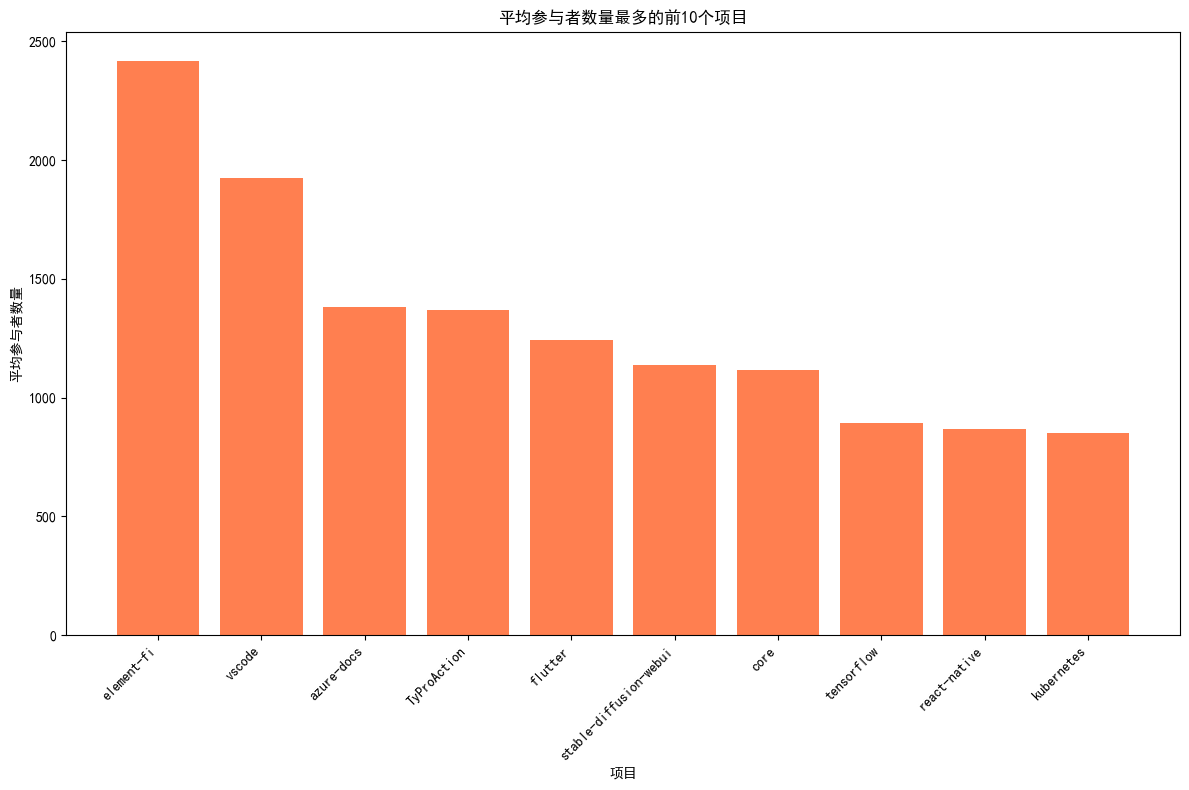


总项目个数: 295


In [15]:
#项目活跃度系数 指标三（participants.json得来）
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
from sklearn.preprocessing import MinMaxScaler

# 设置保存路径
save_path = r"C:\Users\flipp\Desktop\Dase导论\数据集"

# 如果目录不存在，创建它
if not os.path.exists(save_path):
    os.makedirs(save_path)
    print(f"已创建目录: {save_path}")
else:
    print(f"保存路径已存在: {save_path}")

# 全局设置中文字体
font_path = r'C:\Windows\Fonts\simhei.ttf'  # 更新为实际字体路径
if not os.path.exists(font_path):
    font_path = r'C:\Windows\Fonts\msyh.ttc'  # 备选字体路径
    if not os.path.exists(font_path):
        raise FileNotFoundError("未找到支持中文的字体文件 (simhei.ttf 或 msyh.ttc)。请确认字体路径是否正确。")

matplotlib.rcParams['font.family'] = 'SimHei'  # 或 'Microsoft YaHei'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 或 ['Microsoft YaHei']
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 定义递归查找 JSON 文件的函数
def find_json_file(project_path, filename):
    """
    在给定的项目路径中递归搜索指定的 JSON 文件。
    如果找到多个，返回第一个找到的文件路径。
    如果未找到，返回 None。
    """
    for root, dirs, files in os.walk(project_path):
        if filename in files:
            return os.path.join(root, filename)
    return None

# 主文件夹路径
main_folder = r"C:\Users\flipp\Desktop\top_300_metrics"

# 初始化 DataFrame 来存储所有项目的数据
all_projects_participants = pd.DataFrame()

# 初始化集合来跟踪所有项目名称
all_project_names = set()

# 定义正则表达式匹配 'YYYY-MM' 格式
date_pattern = re.compile(r'^\d{4}-\d{2}$')

# 定义函数预测缺失月份的数据（平均填充）
def predict_missing_months(df, year, project, metric):
    """
    对于给定项目和年份，预测缺失月份的数据。
    使用简单的平均值填充缺失月份。
    """
    # 预期的月份数
    expected_months = 12

    # 现有的月份
    existing_months = df[(df['Year'] == year) & (df['Project'] == project)]['Month'].tolist()

    missing_months = sorted(list(set(range(1, 13)) - set(existing_months)))

    if not missing_months:
        return df

    # 计算现有数据的平均值
    mean_value = df[(df['Year'] == year) & (df['Project'] == project)][metric].mean()

    # 使用平均值填充缺失月份
    for month in missing_months:
        new_row = {'Year': year, 'Project': project, 'Month': month, metric: mean_value}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

    return df

# 遍历主文件夹中的所有大项目子文件夹
for large_project_name in os.listdir(main_folder):
    large_project_path = os.path.join(main_folder, large_project_name)
    if os.path.isdir(large_project_path):
        print(f"\n正在处理大项目: {large_project_name}")

        # 遍历大项目文件夹中的所有小项目子文件夹
        for small_project_name in os.listdir(large_project_path):
            small_project_path = os.path.join(large_project_path, small_project_name)
            if os.path.isdir(small_project_path):
                print(f"  正在处理小项目: {small_project_name}")

                # 设置项目名称为小项目名称
                # 为了避免项目名称冲突，可以将大项目名称和小项目名称组合
                # 如果小项目文件夹中包含多个项目，可以进一步区分

                # 处理 participants.json
                participants_file = find_json_file(small_project_path, 'participants.json')
                if participants_file:
                    with open(participants_file, 'r', encoding='utf-8') as f_part:
                        try:
                            participants_data = json.load(f_part)
                            if isinstance(participants_data, dict):
                                # 检查 participants_data 的结构
                                # 如果 participants_data 的键是日期格式，则认为是单个项目的数据
                                # 否则，假设键是项目名称，值是日期-参与者数量的字典
                                first_key = next(iter(participants_data))
                                if date_pattern.match(first_key):
                                    # 单个项目的数据
                                    project_name = small_project_name
                                    all_project_names.add(project_name)
                                    df_participants = pd.DataFrame(list(participants_data.items()), columns=['Date', 'Participants'])
                                    df_participants['Project'] = project_name

                                    # 过滤符合 'YYYY-MM' 格式的日期
                                    df_participants = df_participants[df_participants['Date'].apply(lambda x: bool(date_pattern.match(x)))]

                                    # 提取年份和月份
                                    df_participants['Year'] = pd.to_datetime(df_participants['Date'], format='%Y-%m', errors='coerce').dt.year
                                    df_participants['Month'] = pd.to_datetime(df_participants['Date'], format='%Y-%m', errors='coerce').dt.month

                                    # 删除无法解析为日期的行
                                    df_participants = df_participants.dropna(subset=['Year', 'Month'])

                                    # 将 'Year' 和 'Month' 转换为整数
                                    df_participants['Year'] = df_participants['Year'].astype(int)
                                    df_participants['Month'] = df_participants['Month'].astype(int)

                                    # 确保 Participants 是数值类型
                                    df_participants['Participants'] = pd.to_numeric(df_participants['Participants'], errors='coerce').fillna(0)

                                    # 预测并补全缺失月份的数据
                                    years = df_participants['Year'].unique()
                                    for year in years:
                                        df_participants = predict_missing_months(df_participants, year, project_name, 'Participants')

                                    # 按年份和项目分组，计算每年的平均参与者数量
                                    yearly_participants = df_participants.groupby(['Year', 'Project']).agg(
                                        Average_Participants=('Participants', 'mean')
                                    ).reset_index()

                                    # 合并到总数据中
                                    all_projects_participants = pd.concat([all_projects_participants, yearly_participants], ignore_index=True)
                                else:
                                    # 认为 participants_data 包含多个项目
                                    for proj_name, proj_data in participants_data.items():
                                        if not isinstance(proj_data, dict):
                                            print(f"    项目 '{proj_name}' 的 Participants 数据格式不正确，跳过。")
                                            continue
                                        # 组合项目名称以确保唯一性
                                        project_name = f"{large_project_name}_{small_project_name}_{proj_name}"
                                        all_project_names.add(project_name)
                                        df_participants = pd.DataFrame(list(proj_data.items()), columns=['Date', 'Participants'])
                                        df_participants['Project'] = project_name

                                        # 过滤符合 'YYYY-MM' 格式的日期
                                        df_participants = df_participants[df_participants['Date'].apply(lambda x: bool(date_pattern.match(x)))]

                                        # 提取年份和月份
                                        df_participants['Year'] = pd.to_datetime(df_participants['Date'], format='%Y-%m', errors='coerce').dt.year
                                        df_participants['Month'] = pd.to_datetime(df_participants['Date'], format='%Y-%m', errors='coerce').dt.month

                                        # 删除无法解析为日期的行
                                        df_participants = df_participants.dropna(subset=['Year', 'Month'])

                                        # 将 'Year' 和 'Month' 转换为整数
                                        df_participants['Year'] = df_participants['Year'].astype(int)
                                        df_participants['Month'] = df_participants['Month'].astype(int)

                                        # 确保 Participants 是数值类型
                                        df_participants['Participants'] = pd.to_numeric(df_participants['Participants'], errors='coerce').fillna(0)

                                        # 预测并补全缺失月份的数据
                                        years = df_participants['Year'].unique()
                                        for year in years:
                                            df_participants = predict_missing_months(df_participants, year, project_name, 'Participants')

                                        # 按年份和项目分组，计算每年的平均参与者数量
                                        yearly_participants = df_participants.groupby(['Year', 'Project']).agg(
                                            Average_Participants=('Participants', 'mean')
                                        ).reset_index()

                                        # 合并到总数据中
                                        all_projects_participants = pd.concat([all_projects_participants, yearly_participants], ignore_index=True)
                            else:
                                print(f"  {participants_file} 的JSON结构不是字典，跳过。")
                        except json.JSONDecodeError:
                            print(f"  无法解码 {participants_file}，可能不是有效的JSON文件。")
                else:
                    print(f"  {small_project_name} 中未找到 participants.json 文件。")

# 处理完所有项目后，进行汇总和分析
if all_projects_participants.empty:
    print("没有找到任何参与者数据。")
else:
    # 按项目计算平均参与者数量（如果有重复项目，则取平均）
    average_participants_per_project = all_projects_participants.groupby('Project').agg(
        Average_Participants=('Average_Participants', 'mean')
    ).reset_index()
    
    # 排序，平均参与者数量从大到小
    average_participants_sorted = average_participants_per_project.sort_values(by='Average_Participants', ascending=False)
    
    # 选择平均参与者数量最多的前10个项目
    top10_participants = average_participants_sorted.head(10)
    
    # 保存参与者数据到 CSV
    participants_csv = os.path.join(save_path, 'top10_average_participants.csv')
    top10_participants.to_csv(participants_csv, index=False, encoding='utf-8-sig')
    print(f"参与者数据（前10个项目）已保存到 '{participants_csv}'。")
    
    # 绘制参与者数量条形图
    plt.figure(figsize=(12, 8))
    plt.bar(top10_participants['Project'], top10_participants['Average_Participants'], color='coral')
    plt.xlabel('项目')
    plt.ylabel('平均参与者数量')
    plt.title('平均参与者数量最多的前10个项目')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # 保存参与者条形图
    plot_participants_image_path = os.path.join(save_path, 'top10_average_participants.png')
    plt.savefig(plot_participants_image_path, dpi=300)
    print(f"参与者条形图已保存为 '{plot_participants_image_path}'。")
    
    plt.show()

    # 打印总项目个数以验证正确性
    total_projects = len(all_project_names)
    print(f"\n总项目个数: {total_projects}")


保存路径已存在: C:\Users\flipp\Desktop\Dase导论\数据集

正在处理大项目: AdguardTeam
  正在处理小项目: AdguardFilters

正在处理大项目: airbytehq
  正在处理小项目: airbyte

正在处理大项目: alibaba
  正在处理小项目: nacos

正在处理大项目: angular
  正在处理小项目: angular
  正在处理小项目: components

正在处理大项目: ankidroid
  正在处理小项目: Anki-Android

正在处理大项目: ansible
  正在处理小项目: ansible

正在处理大项目: ant-design
  正在处理小项目: ant-design

正在处理大项目: apache
  正在处理小项目: airflow
  正在处理小项目: apisix
  正在处理小项目: arrow
  正在处理小项目: beam
  正在处理小项目: dolphinscheduler
  正在处理小项目: doris
  正在处理小项目: flink
  正在处理小项目: hudi
  正在处理小项目: iceberg
  正在处理小项目: pulsar
  正在处理小项目: shardingsphere
  正在处理小项目: spark
  正在处理小项目: superset
  正在处理小项目: tvm

正在处理大项目: apple
  正在处理小项目: swift

正在处理大项目: appsmithorg
  正在处理小项目: appsmith

正在处理大项目: archway-network
  正在处理小项目: testnets

正在处理大项目: ArduPilot
  正在处理小项目: ardupilot

正在处理大项目: argoproj
  正在处理小项目: argo-cd

正在处理大项目: AUTOMATIC1111
  正在处理小项目: stable-diffusion-webui

正在处理大项目: Automattic
  正在处理小项目: jetpack
  正在处理小项目: wp-calypso

正在处理大项目: aws
  正在处理小项目: aws-cdk

正在处理大项目: aws-ampli

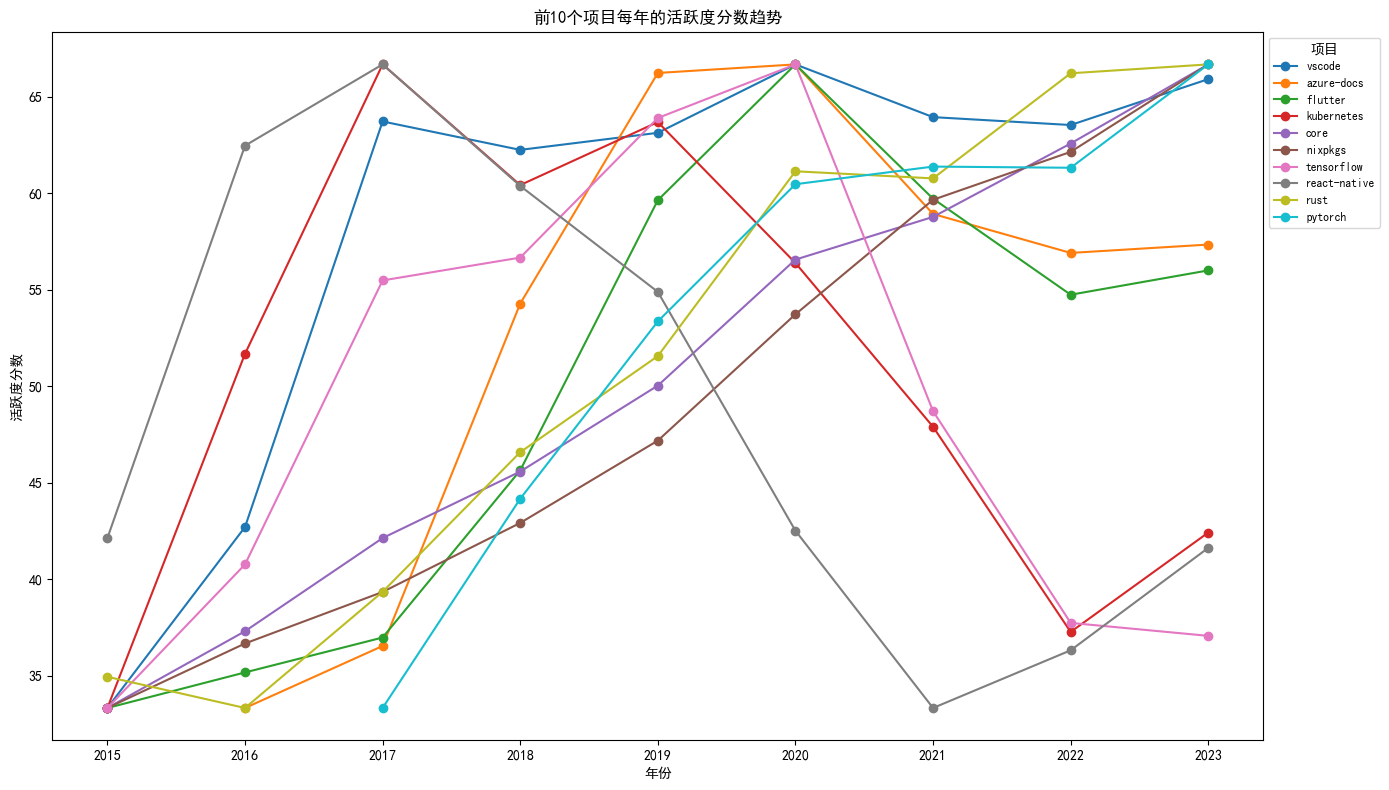


生成的文件列表：
activity_pivot.csv
activity_pivot_top10.csv
attention_results.csv
attention_scores.csv
average_activity_score_per_project.csv
development_efficiency_results.csv
development_efficiency_results_top10.csv
fork_stars_avg_results.csv
health_score_distribution_scaled_geometric_mean.png
health_score_full_scaled_geometric_mean_per_project.csv
health_score_scaled_geometric_mean_per_project.csv
problem_solving.csv
problem_solving_top10.csv
projects_activity_comparison_top10.png
stickiness_pivot.csv
stickiness_variance.csv
stickiness_variance_top10.png
top10_activity_score_overall.csv
top10_activity_score_pivot.csv
top10_activity_score_trend.png
top10_average_participants.csv
top10_average_participants.png
top10_health_score_scaled_geometric_mean_per_project.csv
每个项目的平均活跃度分数已保存到 'C:\Users\flipp\Desktop\Dase导论\数据集\average_activity_score_per_project.csv'。

所有项目每年的活跃度分数已保存到 'C:\Users\flipp\Desktop\Dase导论\数据集\all_projects_activity_score_long.csv'。


In [28]:
# 项目活跃度系数 总结果（由前面三个指标加权计算得来）
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 设置保存路径
save_path = r"C:\Users\flipp\Desktop\Dase导论\数据集"

# 如果目录不存在，创建它
if not os.path.exists(save_path):
    os.makedirs(save_path)
    print(f"已创建目录: {save_path}")
else:
    print(f"保存路径已存在: {save_path}")

# 全局设置中文字体
font_path = r'C:\Windows\Fonts\simhei.ttf'  # 更新为实际字体路径
if not os.path.exists(font_path):
    font_path = r'C:\Windows\Fonts\msyh.ttc'  # 备选字体路径
    if not os.path.exists(font_path):
        raise FileNotFoundError("未找到支持中文的字体文件 (simhei.ttf 或 msyh.ttc)。请确认字体路径是否正确。")

matplotlib.rcParams['font.family'] = 'SimHei'  # 或 'Microsoft YaHei'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 或 ['Microsoft YaHei']
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 主文件夹路径
main_folder = r"C:\Users\flipp\Desktop\top_300_metrics"

# 初始化 DataFrame 来存储所有项目的数据
all_projects_activity = pd.DataFrame()
all_projects_dau = pd.DataFrame()
all_projects_participants = pd.DataFrame()

# 初始化集合来跟踪所有项目名称
all_project_names = set()

# 定义正则表达式匹配 'YYYY-MM' 格式
date_pattern = re.compile(r'^\d{4}-\d{2}$')

# 定义函数预测缺失月份的数据（平均填充）
def predict_missing_months(df, year, project, metric):
    """
    对于给定项目和年份，预测缺失月份的数据。
    使用简单的平均值填充缺失月份。
    """
    # 预期的月份数
    expected_months = 12

    # 现有的月份
    existing_months = df[(df['Year'] == year) & (df['Project'] == project)]['Month'].tolist()

    missing_months = sorted(list(set(range(1, 13)) - set(existing_months)))

    if not missing_months:
        return df

    # 计算现有数据的平均值
    mean_value = df[(df['Year'] == year) & (df['Project'] == project)][metric].mean()

    # 使用平均值填充缺失月份
    for month in missing_months:
        new_row = {'Year': year, 'Project': project, 'Month': month, metric: mean_value}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

    return df

# 遍历主文件夹中的所有大项目子文件夹
for large_project_name in os.listdir(main_folder):
    large_project_path = os.path.join(main_folder, large_project_name)
    if os.path.isdir(large_project_path):
        print(f"\n正在处理大项目: {large_project_name}")

        # 遍历大项目文件夹中的所有小项目子文件夹
        for small_project_name in os.listdir(large_project_path):
            small_project_path = os.path.join(large_project_path, small_project_name)
            if os.path.isdir(small_project_path):
                print(f"  正在处理小项目: {small_project_name}")

                # 设置项目名称为小项目名称
                # 但是为了避免项目名称冲突，可以将大项目名称和小项目名称组合
                # 如果小项目文件夹中包含多个项目，可以进一步区分

                # 处理 activity.json
                activity_file = os.path.join(small_project_path, 'activity.json')
                if os.path.exists(activity_file):
                    with open(activity_file, 'r', encoding='utf-8') as f:
                        try:
                            activity_data = json.load(f)
                            if isinstance(activity_data, dict):
                                # 检查 activity_data 的结构
                                # 如果 activity_data 的键是日期格式，则认为是单个项目的数据
                                # 否则，假设键是项目名称，值是日期-活跃度的字典
                                first_key = next(iter(activity_data))
                                if date_pattern.match(first_key):
                                    # 单个项目的数据
                                    project_name = small_project_name
                                    all_project_names.add(project_name)
                                    df_activity = pd.DataFrame(list(activity_data.items()), columns=['Date', 'Activity'])
                                    df_activity['Project'] = project_name

                                    # 过滤符合 'YYYY-MM' 格式的日期
                                    df_activity = df_activity[df_activity['Date'].apply(lambda x: bool(date_pattern.match(x)))]

                                    # 提取年份和月份，明确指定格式
                                    df_activity['Year'] = pd.to_datetime(df_activity['Date'], format='%Y-%m', errors='coerce').dt.year
                                    df_activity['Month'] = pd.to_datetime(df_activity['Date'], format='%Y-%m', errors='coerce').dt.month

                                    # 删除无法解析为日期的行
                                    df_activity = df_activity.dropna(subset=['Year', 'Month'])

                                    # 将 'Year' 和 'Month' 转换为整数
                                    df_activity['Year'] = df_activity['Year'].astype(int)
                                    df_activity['Month'] = df_activity['Month'].astype(int)

                                    # 确保 Activity 是数值类型
                                    df_activity['Activity'] = pd.to_numeric(df_activity['Activity'], errors='coerce').fillna(0)

                                    # 预测并补全缺失月份的数据
                                    years = df_activity['Year'].unique()
                                    for year in years:
                                        df_activity = predict_missing_months(df_activity, year, project_name, 'Activity')

                                    # 按年份和项目分组，计算每年的总 MAU 和活跃的月份数
                                    yearly_activity = df_activity.groupby(['Year', 'Project']).agg(
                                        Sum_MAU=('Activity', 'sum'),
                                        Active_Months=('Month', 'nunique')
                                    ).reset_index()

                                    # 选择需要的列
                                    yearly_activity = yearly_activity[['Year', 'Project', 'Sum_MAU', 'Active_Months']]

                                    # 合并到总数据中
                                    all_projects_activity = pd.concat([all_projects_activity, yearly_activity], ignore_index=True)
                                else:
                                    # 认为 activity_data 包含多个项目
                                    for proj_name, proj_data in activity_data.items():
                                        if not isinstance(proj_data, dict):
                                            print(f"    项目 '{proj_name}' 的活动数据格式不正确，跳过。")
                                            continue
                                        project_name = f"{large_project_name}_{small_project_name}_{proj_name}"
                                        all_project_names.add(project_name)
                                        df_activity = pd.DataFrame(list(proj_data.items()), columns=['Date', 'Activity'])
                                        df_activity['Project'] = project_name

                                        # 过滤符合 'YYYY-MM' 格式的日期
                                        df_activity = df_activity[df_activity['Date'].apply(lambda x: bool(date_pattern.match(x)))]

                                        # 提取年份和月份，明确指定格式
                                        df_activity['Year'] = pd.to_datetime(df_activity['Date'], format='%Y-%m', errors='coerce').dt.year
                                        df_activity['Month'] = pd.to_datetime(df_activity['Date'], format='%Y-%m', errors='coerce').dt.month

                                        # 删除无法解析为日期的行
                                        df_activity = df_activity.dropna(subset=['Year', 'Month'])

                                        # 将 'Year' 和 'Month' 转换为整数
                                        df_activity['Year'] = df_activity['Year'].astype(int)
                                        df_activity['Month'] = df_activity['Month'].astype(int)

                                        # 确保 Activity 是数值类型
                                        df_activity['Activity'] = pd.to_numeric(df_activity['Activity'], errors='coerce').fillna(0)

                                        # 预测并补全缺失月份的数据
                                        years = df_activity['Year'].unique()
                                        for year in years:
                                            df_activity = predict_missing_months(df_activity, year, project_name, 'Activity')

                                        # 按年份和项目分组，计算每年的总 MAU 和活跃的月份数
                                        yearly_activity = df_activity.groupby(['Year', 'Project']).agg(
                                            Sum_MAU=('Activity', 'sum'),
                                            Active_Months=('Month', 'nunique')
                                        ).reset_index()

                                        # 选择需要的列
                                        yearly_activity = yearly_activity[['Year', 'Project', 'Sum_MAU', 'Active_Months']]

                                        # 合并到总数据中
                                        all_projects_activity = pd.concat([all_projects_activity, yearly_activity], ignore_index=True)
                            else:
                                print(f"  {activity_file} 的JSON结构不是字典，跳过。")
                        except json.JSONDecodeError:
                            print(f"  无法解码 {activity_file}，可能不是有效的JSON文件。")
                else:
                    print(f"  {small_project_name} 中未找到 activity.json 文件。")

                # 处理 active_dates_and_times.json 来计算 Stickiness
                active_dates_file = os.path.join(small_project_path, 'active_dates_and_times.json')
                if os.path.exists(active_dates_file):
                    with open(active_dates_file, 'r', encoding='utf-8') as f_dau:
                        try:
                            active_dates_data = json.load(f_dau)
                            if isinstance(active_dates_data, dict):
                                # 检查结构是否是单个项目或多个项目
                                first_key = next(iter(active_dates_data))
                                if date_pattern.match(first_key):
                                    # 单个项目的数据
                                    project_name = small_project_name
                                    df_dau = pd.DataFrame(list(active_dates_data.items()), columns=['Date', 'DAU'])
                                    df_dau['Project'] = project_name

                                    # 过滤符合 'YYYY-MM' 格式的日期
                                    df_dau = df_dau[df_dau['Date'].apply(lambda x: bool(date_pattern.match(x)))]

                                    # 提取年份和月份，明确指定格式
                                    df_dau['Year'] = pd.to_datetime(df_dau['Date'], format='%Y-%m', errors='coerce').dt.year
                                    df_dau['Month'] = pd.to_datetime(df_dau['Date'], format='%Y-%m', errors='coerce').dt.month

                                    # 删除无法解析为日期的行
                                    df_dau = df_dau.dropna(subset=['Year', 'Month'])

                                    # 将 'Year' 和 'Month' 转换为整数
                                    df_dau['Year'] = df_dau['Year'].astype(int)
                                    df_dau['Month'] = df_dau['Month'].astype(int)

                                    # 确保 DAU 是数值类型
                                    df_dau['DAU'] = pd.to_numeric(df_dau['DAU'], errors='coerce').fillna(0)

                                    # 预测并补全缺失月份的数据
                                    years = df_dau['Year'].unique()
                                    for year in years:
                                        df_dau = predict_missing_months(df_dau, year, project_name, 'DAU')

                                    # 按年份和项目分组，计算每年的 Sum_Average_DAU 和 Num_Months
                                    yearly_dau = df_dau.groupby(['Year', 'Project']).agg(
                                        Sum_Average_DAU=('DAU', 'sum'),
                                        Num_Months=('DAU', 'count')
                                    ).reset_index()

                                    # 合并到总数据中
                                    all_projects_dau = pd.concat([all_projects_dau, yearly_dau], ignore_index=True)
                                else:
                                    # 认为 active_dates_data 包含多个项目
                                    for proj_name, proj_data in active_dates_data.items():
                                        if not isinstance(proj_data, dict):
                                            print(f"    项目 '{proj_name}' 的 DAU 数据格式不正确，跳过。")
                                            continue
                                        project_name = f"{large_project_name}_{small_project_name}_{proj_name}"
                                        df_dau = pd.DataFrame(list(proj_data.items()), columns=['Date', 'DAU'])
                                        df_dau['Project'] = project_name

                                        # 过滤符合 'YYYY-MM' 格式的日期
                                        df_dau = df_dau[df_dau['Date'].apply(lambda x: bool(date_pattern.match(x)))]

                                        # 提取年份和月份，明确指定格式
                                        df_dau['Year'] = pd.to_datetime(df_dau['Date'], format='%Y-%m', errors='coerce').dt.year
                                        df_dau['Month'] = pd.to_datetime(df_dau['Date'], format='%Y-%m', errors='coerce').dt.month

                                        # 删除无法解析为日期的行
                                        df_dau = df_dau.dropna(subset=['Year', 'Month'])

                                        # 将 'Year' 和 'Month' 转换为整数
                                        df_dau['Year'] = df_dau['Year'].astype(int)
                                        df_dau['Month'] = df_dau['Month'].astype(int)

                                        # 确保 DAU 是数值类型
                                        df_dau['DAU'] = pd.to_numeric(df_dau['DAU'], errors='coerce').fillna(0)

                                        # 预测并补全缺失月份的数据
                                        years = df_dau['Year'].unique()
                                        for year in years:
                                            df_dau = predict_missing_months(df_dau, year, project_name, 'DAU')

                                        # 按年份和项目分组，计算每年的 Sum_Average_DAU 和 Num_Months
                                        yearly_dau = df_dau.groupby(['Year', 'Project']).agg(
                                            Sum_Average_DAU=('DAU', 'sum'),
                                            Num_Months=('DAU', 'count')
                                        ).reset_index()

                                        # 合并到总数据中
                                        all_projects_dau = pd.concat([all_projects_dau, yearly_dau], ignore_index=True)
                            else:
                                print(f"  {active_dates_file} 的JSON结构不是字典，跳过。")
                        except json.JSONDecodeError:
                            print(f"  无法解码 {active_dates_file}，可能不是有效的JSON文件。")
                else:
                    print(f"  {small_project_name} 中未找到 active_dates_and_times.json 文件。")

                # 处理 participants.json
                participants_file = os.path.join(small_project_path, 'participants.json')
                if os.path.exists(participants_file):
                    with open(participants_file, 'r', encoding='utf-8') as f_part:
                        try:
                            participants_data = json.load(f_part)
                            if isinstance(participants_data, dict):
                                # 检查结构是否是单个项目或多个项目
                                first_key = next(iter(participants_data))
                                if date_pattern.match(first_key):
                                    # 单个项目的数据
                                    project_name = small_project_name
                                    df_participants = pd.DataFrame(list(participants_data.items()), columns=['Date', 'Participants'])
                                    df_participants['Project'] = project_name

                                    # 过滤符合 'YYYY-MM' 格式的日期
                                    df_participants = df_participants[df_participants['Date'].apply(lambda x: bool(date_pattern.match(x)))]

                                    # 提取年份和月份，明确指定格式
                                    df_participants['Year'] = pd.to_datetime(df_participants['Date'], format='%Y-%m', errors='coerce').dt.year
                                    df_participants['Month'] = pd.to_datetime(df_participants['Date'], format='%Y-%m', errors='coerce').dt.month

                                    # 删除无法解析为日期的行
                                    df_participants = df_participants.dropna(subset=['Year', 'Month'])

                                    # 将 'Year' 和 'Month' 转换为整数
                                    df_participants['Year'] = df_participants['Year'].astype(int)
                                    df_participants['Month'] = df_participants['Month'].astype(int)

                                    # 确保 Participants 是数值类型
                                    df_participants['Participants'] = pd.to_numeric(df_participants['Participants'], errors='coerce').fillna(0)

                                    # 按项目分组，计算平均参与者数量
                                    average_participants = df_participants.groupby(['Project']).agg(
                                        Average_Participants=('Participants', 'mean')
                                    ).reset_index()

                                    # 合并到总数据中
                                    all_projects_participants = pd.concat([all_projects_participants, average_participants], ignore_index=True)
                                else:
                                    # 认为 participants_data 包含多个项目
                                    for proj_name, proj_data in participants_data.items():
                                        if not isinstance(proj_data, dict):
                                            print(f"    项目 '{proj_name}' 的 Participants 数据格式不正确，跳过。")
                                            continue
                                        project_name = f"{large_project_name}_{small_project_name}_{proj_name}"
                                        df_participants = pd.DataFrame(list(proj_data.items()), columns=['Date', 'Participants'])
                                        df_participants['Project'] = project_name

                                        # 过滤符合 'YYYY-MM' 格式的日期
                                        df_participants = df_participants[df_participants['Date'].apply(lambda x: bool(date_pattern.match(x)))]

                                        # 提取年份和月份，明确指定格式
                                        df_participants['Year'] = pd.to_datetime(df_participants['Date'], format='%Y-%m', errors='coerce').dt.year
                                        df_participants['Month'] = pd.to_datetime(df_participants['Date'], format='%Y-%m', errors='coerce').dt.month

                                        # 删除无法解析为日期的行
                                        df_participants = df_participants.dropna(subset=['Year', 'Month'])

                                        # 将 'Year' 和 'Month' 转换为整数
                                        df_participants['Year'] = df_participants['Year'].astype(int)
                                        df_participants['Month'] = df_participants['Month'].astype(int)

                                        # 确保 Participants 是数值类型
                                        df_participants['Participants'] = pd.to_numeric(df_participants['Participants'], errors='coerce').fillna(0)

                                        # 按项目分组，计算平均参与者数量
                                        average_participants = df_participants.groupby(['Project']).agg(
                                            Average_Participants=('Participants', 'mean')
                                        ).reset_index()

                                        # 合并到总数据中
                                        all_projects_participants = pd.concat([all_projects_participants, average_participants], ignore_index=True)
                            else:
                                print(f"  {participants_file} 的JSON结构不是字典，跳过。")
                        except json.JSONDecodeError:
                            print(f"  无法解码 {participants_file}，可能不是有效的JSON文件。")
                else:
                    print(f"  {small_project_name} 中未找到 participants.json 文件。")

# 计算 Stickiness
if all_projects_activity.empty or all_projects_dau.empty:
    print("\n没有找到任何活动数据或 DAU 数据。")
else:
    # 合并活动度和 DAU 数据，确保只有同时存在的数据被保留
    merged_activity_dau = pd.merge(all_projects_activity, all_projects_dau, on=['Year', 'Project'], how='inner')

    # 检查合并后的数据类型
    if not pd.api.types.is_numeric_dtype(merged_activity_dau['Sum_Average_DAU']) or not pd.api.types.is_numeric_dtype(merged_activity_dau['Sum_MAU']):
        print("Sum_Average_DAU 或 Sum_MAU 不是数值类型，无法进行计算。")
    else:
        # 避免 Sum_MAU 为零的情况
        merged_activity_dau = merged_activity_dau[merged_activity_dau['Sum_MAU'] != 0]

        # 计算 Stickiness 指标
        # 公式: Stickiness = Sum_Average_DAU / Sum_MAU
        merged_activity_dau['Stickiness_Score'] = merged_activity_dau['Sum_Average_DAU'] / merged_activity_dau['Sum_MAU']

        # 按项目汇总 Stickiness_Score 的方差和年份数量
        stickiness_variance = merged_activity_dau.groupby('Project').agg(
            Stickiness_Variance=('Stickiness_Score', 'var'),
            Year_Count=('Year', 'nunique')  # 计算年份数量
        ).reset_index()

        # 处理方差为NaN（即只有一年的数据）
        stickiness_variance['Stickiness_Variance'] = stickiness_variance['Stickiness_Variance'].fillna(0)

        print("\nStickiness 方差和年份数量计算完成。")
        print(stickiness_variance.head())

# 处理参与者数据
if all_projects_participants.empty:
    print("\n没有找到任何参与者数据。")
else:
    # 按项目计算平均参与者数量（已经在前面计算完成）
    participants_data = all_projects_participants.copy()
    print("\n参与者数据计算完成。")
    print(participants_data.head())

# 合并所有指标并计算活跃度分数
if all_projects_activity.empty or all_projects_dau.empty or all_projects_participants.empty:
    print("\n缺少活动度、粘度或参与者数据，无法计算活跃度分数。")
else:
    # 活跃度数据（Sum_MAU per Project）
    activity_data = all_projects_activity.groupby('Project').agg(
        Total_MAU=('Sum_MAU', 'sum')  # 总 MAU
    ).reset_index()

    # 粘度数据（Stickiness_Variance per Project）
    stickiness_data = stickiness_variance.copy()

    # 参与者数据（Average Participants per Project）
    participants_data = participants_data.copy()

    # 合并所有指标
    combined_df = pd.merge(activity_data, stickiness_data, on='Project', how='inner')
    combined_df = pd.merge(combined_df, participants_data, on='Project', how='inner')

    # 打印“element fi”的数据（如果存在）
    if 'element fi' in combined_df['Project'].values:
        print(f"\nelement fi 的合并数据:\n{combined_df[combined_df['Project'] == 'element fi']}")

    # 设定最低数据点数量
    min_data_points = 6
    min_years = 2  # 至少2个年份的数据

    # 计算每个项目的原始数据点数量（未填充前）
    original_activity_counts = all_projects_activity.groupby('Project')['Active_Months'].sum().reset_index()
    original_dau_counts = all_projects_dau.groupby('Project')['Num_Months'].sum().reset_index()
    year_counts = merged_activity_dau.groupby('Project')['Year'].nunique().reset_index()
    year_counts = year_counts.rename(columns={'Year': 'Year_Count'})

    # 筛选出满足最低数据点数量和年份数的项目
    valid_projects_activity = original_activity_counts[original_activity_counts['Active_Months'] >= min_data_points]['Project']
    valid_projects_dau = original_dau_counts[original_dau_counts['Num_Months'] >= min_data_points]['Project']
    valid_projects_years = year_counts[year_counts['Year_Count'] >= min_years]['Project']

    # 取三个条件的交集
    valid_projects = set(valid_projects_activity).intersection(set(valid_projects_dau)).intersection(set(valid_projects_years))

    print(f"\n有效项目数量: {len(valid_projects)}")

    # 仅保留有效项目
    combined_df = combined_df[combined_df['Project'].isin(valid_projects)]

    # 检查是否有零值（所有指标均为零的项目）
    zero_total_mau = combined_df['Total_MAU'] == 0
    zero_stickiness_var = combined_df['Stickiness_Variance'] == 0
    zero_participants = combined_df['Average_Participants'] == 0

    # 仅排除所有指标均为零的项目
    combined_df['All_Zeros'] = zero_total_mau & zero_stickiness_var & zero_participants

    if combined_df['All_Zeros'].any():
        excluded_projects = combined_df[combined_df['All_Zeros']]['Project'].tolist()
        print("\n发现以下项目在所有指标上均为零，将被排除：")
        print(excluded_projects)
        # 记录被排除的项目到文件
        excluded_projects_csv = os.path.join(save_path, 'excluded_projects.csv')
        pd.DataFrame({'Project': excluded_projects}).to_csv(excluded_projects_csv, index=False, encoding='utf-8-sig')
        print(f"被排除的项目已保存到 '{excluded_projects_csv}'。")
        # 过滤掉这些项目
        combined_df = combined_df[~combined_df['Project'].isin(excluded_projects)]
    else:
        print("所有项目的指标均正常。")

    # 如果所有项目均被排除
    if combined_df.empty:
        print("所有项目均被排除，没有可用的数据进行分析。")
    else:
        # 使用 MinMaxScaler 进行标准化，确保分数在0-100之间
        scaler = MinMaxScaler(feature_range=(0, 100))
        combined_df[['Total_MAU_Scaled', 'Stickiness_Variance_Scaled', 'Average_Participants_Scaled']] = scaler.fit_transform(
            combined_df[['Total_MAU', 'Stickiness_Variance', 'Average_Participants']]
        )

        # 反转 Stickiness_Variance_Scaled，使方差越小，分数越高
        combined_df['Stickiness_Variance_Scaled_Reversed'] = 100 - combined_df['Stickiness_Variance_Scaled']

        # 打印“element fi”的标准化数据（如果存在）
        if 'element fi' in combined_df['Project'].values:
            print(f"\nelement fi 的标准化指标:\n{combined_df[combined_df['Project'] == 'element fi'][['Total_MAU_Scaled', 'Stickiness_Variance_Scaled_Reversed', 'Average_Participants_Scaled']]}")

        # 构建活跃度分数（等权重），使用反转后的 Stickiness_Variance
        combined_df['Activity_Score'] = (combined_df['Total_MAU_Scaled'] +
                                         combined_df['Stickiness_Variance_Scaled_Reversed'] +
                                         combined_df['Average_Participants_Scaled']) / 3

        # 打印“element fi”的 Activity_Score（如果存在）
        if 'element fi' in combined_df['Project'].values:
            print(f"element fi 的 Activity_Score: {combined_df[combined_df['Project'] == 'element fi']['Activity_Score'].values}")

        # ############### 新增部分开始 ################

        # 计算每个项目的平均活跃度分数
        # 使用 combined_df 数据框，该数据框包含每个项目的 Activity_Score
        average_activity_score = combined_df.groupby('Project').agg(
            Average_Activity_Score=('Activity_Score', 'mean')
        ).reset_index()

        # 打印“element fi”的平均活跃度分数（如果存在）
        if 'element fi' in average_activity_score['Project'].values:
            print(f"\nelement fi 的平均活跃度分数: {average_activity_score[average_activity_score['Project'] == 'element fi']['Average_Activity_Score'].values}")

        # 保存平均活跃度分数到 CSV
        average_activity_score_csv = os.path.join(save_path, 'average_activity_score_per_project.csv')
        average_activity_score.to_csv(average_activity_score_csv, index=False, encoding='utf-8-sig')
        print(f"每个项目的平均活跃度分数已保存到 '{average_activity_score_csv}'。")

        # ############### 新增部分结束 ################

        # 排除 Activity_Score 为0的项目
        combined_df = combined_df[combined_df['Activity_Score'] > 0]

        # 按活跃度分数排序，选择前10
        top10_activity_score = combined_df.sort_values(by='Activity_Score', ascending=False).head(10)

        # 检查是否有分数为0的项目
        zero_scores = top10_activity_score[top10_activity_score['Activity_Score'] == 0]
        if not zero_scores.empty:
            print("\n以下 top10 项目分数为0，将被排除：")
            print(zero_scores['Project'].tolist())
            # 重新选择 top10
            top10_activity_score = top10_activity_score[top10_activity_score['Activity_Score'] > 0].head(10)

        if top10_activity_score.empty:
            print("没有足够的项目具有正的活跃度分数。")
        else:
            # 打印 top10 项目的详细信息
            print("\nTop 10 活跃度分数项目:")
            print(top10_activity_score)

            # 保存活跃度分数总体（前10）到 CSV
            activity_score_overall_csv = os.path.join(save_path, 'top10_activity_score_overall.csv')
            top10_activity_score.to_csv(activity_score_overall_csv, index=False, encoding='utf-8-sig')
            print(f"活跃度分数（前10）已保存到 '{activity_score_overall_csv}'。")

            # 为折线图准备数据
            # 计算每个项目每年的 Activity_Score
            # 需要重新标准化各年的指标并计算分数

            # 先合并所有必要数据
            merged_project_yearly = pd.merge(all_projects_activity, all_projects_dau, on=['Year', 'Project'], how='inner')
            merged_project_yearly = pd.merge(merged_project_yearly, all_projects_participants, on='Project', how='inner')

            # 计算 Stickiness per year
            merged_project_yearly = merged_project_yearly[merged_project_yearly['Sum_MAU'] != 0]
            merged_project_yearly['Stickiness_Score'] = merged_project_yearly['Sum_Average_DAU'] / merged_project_yearly['Sum_MAU']

            # 按 Project 和 Year 分组，计算年度指标
            project_yearly = merged_project_yearly.groupby(['Project', 'Year']).agg(
                Total_MAU=('Sum_MAU', 'sum'),
                Average_Stickiness=('Stickiness_Score', 'mean'),
                Average_Participants=('Average_Participants', 'mean')
            ).reset_index()

            # 计算 Stickiness 方差 per year for each project
            stickiness_var_yearly = merged_project_yearly.groupby(['Project', 'Year']).agg(
                Stickiness_Variance=('Stickiness_Score', 'var')
            ).reset_index()

            # 合并 Stickiness 方差
            project_yearly = pd.merge(project_yearly, stickiness_var_yearly, on=['Project', 'Year'], how='left')
            project_yearly['Stickiness_Variance'] = project_yearly['Stickiness_Variance'].fillna(0)

            # 筛选前10项目
            top10_projects = top10_activity_score['Project'].tolist()
            top10_yearly = project_yearly[project_yearly['Project'].isin(top10_projects)].copy()

            # 定义函数标准化指标并计算 Activity_Score
            def standardize_and_score(group):
                scaler = MinMaxScaler(feature_range=(0, 100))
                group[['Total_MAU_Scaled', 'Stickiness_Variance_Scaled', 'Average_Participants_Scaled']] = scaler.fit_transform(
                    group[['Total_MAU', 'Stickiness_Variance', 'Average_Participants']]
                )
                # 反转 Stickiness_Variance_Scaled
                group['Stickiness_Variance_Scaled_Reversed'] = 100 - group['Stickiness_Variance_Scaled']
                # 计算 Activity_Score
                group['Activity_Score'] = (
                    group['Total_MAU_Scaled'] +
                    group['Stickiness_Variance_Scaled_Reversed'] +
                    group['Average_Participants_Scaled']
                ) / 3
                return group

            # 应用标准化和计算
            top10_yearly = top10_yearly.groupby('Project').apply(standardize_and_score).reset_index(drop=True)

            # 保存每年分数到 CSV（透视表格式）
            # 首先，创建一个透视表
            pivot_activity_scores = top10_yearly.pivot(index='Year', columns='Project', values='Activity_Score')

            # 将年份排序
            pivot_activity_scores = pivot_activity_scores.sort_index()

            # 保存透视表到 CSV
            yearly_activity_score_pivot_csv = os.path.join(save_path, 'top10_activity_score_pivot.csv')
            pivot_activity_scores.to_csv(yearly_activity_score_pivot_csv, encoding='utf-8-sig')
            print(f"\n每年活跃度分数透视表已保存到 '{yearly_activity_score_pivot_csv}'。")

            # 绘制折线图
            plt.figure(figsize=(14, 8))
            for project in top10_activity_score['Project']:
                if project in pivot_activity_scores.columns:
                    plt.plot(pivot_activity_scores.index, pivot_activity_scores[project], marker='o', label=project)

            plt.xlabel('年份')
            plt.ylabel('活跃度分数')
            plt.title('前10个项目每年的活跃度分数趋势')
            plt.legend(title='项目', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
            plt.tight_layout()

            # 保存折线图
            plot_activity_trend_image_path = os.path.join(save_path, 'top10_activity_score_trend.png')
            plt.savefig(plot_activity_trend_image_path, dpi=300)
            print(f"活跃度分数趋势图已保存为 '{plot_activity_trend_image_path}'。")

            plt.show()

            # 列出保存的文件
            print("\n生成的文件列表：")
            for file in os.listdir(save_path):
                print(file)

# ############### 新增部分开始 ################

# 计算每个项目的平均活跃度分数
# 使用 combined_df 数据框，该数据框包含每个项目的 Activity_Score
average_activity_score = combined_df.groupby('Project').agg(
    Average_Activity_Score=('Activity_Score', 'mean')
).reset_index()

# 打印“element fi”的平均活跃度分数（如果存在）
if 'element fi' in average_activity_score['Project'].values:
    print(f"\nelement fi 的平均活跃度分数: {average_activity_score[average_activity_score['Project'] == 'element fi']['Average_Activity_Score'].values}")

# 保存平均活跃度分数到 CSV
average_activity_score_csv = os.path.join(save_path, 'average_activity_score_per_project.csv')
average_activity_score.to_csv(average_activity_score_csv, index=False, encoding='utf-8-sig')
print(f"每个项目的平均活跃度分数已保存到 '{average_activity_score_csv}'。")

# ############### 新增部分结束 ################
# 对所有项目（而非仅 top10）进行年度指标的标准化和计算
project_yearly = project_yearly.groupby('Project').apply(standardize_and_score).reset_index(drop=True)

# 然后把所有项目的 (Project, Year, Activity_Score) 输出到 CSV
all_projects_yearly_long_csv = os.path.join(save_path, 'all_projects_activity_score_long.csv')
project_yearly[['Project', 'Year', 'Activity_Score']].to_csv(
    all_projects_yearly_long_csv,
    index=False,
    encoding='utf-8-sig'
)
print(f"\n所有项目每年的活跃度分数已保存到 '{all_projects_yearly_long_csv}'。")



In [17]:
# 项目开发效率分析（change_request_response_time.json, change_request_age.json ,change_request_resolution_duration.json得来）
import os
import json
import pandas as pd
import numpy as np

# 定义路径
base_dir = r"C:\Users\flipp\Desktop\top_300_metrics"
output_file = r"C:\Users\flipp\Desktop\Dase导论\数据集\development_efficiency_results.csv"
top10_output_file = r"C:\Users\flipp\Desktop\Dase导论\数据集\development_efficiency_results_top10.csv"  # 新增的Top10文件路径

# 参数设置
a = 0.5
b = 0.5

# 读取并处理小项目的数据
def process_project(project_path):
    try:
        # 读取 JSON 数据
        with open(os.path.join(project_path, 'change_request_response_time.json'), 'r') as f:
            respond_data = json.load(f)
        with open(os.path.join(project_path, 'change_request_age.json'), 'r') as f:
            request_age_data = json.load(f)
        with open(os.path.join(project_path, 'change_request_resolution_duration.json'), 'r') as f:
            request_resolution_duration_data = json.load(f)
        
        # 计算每一年的平均响应时长
        response_time_per_year = {}
        
        for month, time in respond_data["avg"].items():
            year = month[:4]  # 提取年份
            if year not in response_time_per_year:
                response_time_per_year[year] = []
            if time > 0:  # 忽略值为0的月份
                response_time_per_year[year].append(time)
        
        # 计算每年的平均响应时间
        response_time_avg_per_year = {}
        for year, times in response_time_per_year.items():
            response_time_avg_per_year[year] = np.mean(times) if times else 0
        
        # 计算每一年的 close 和 duration 数据
        close_per_year = {}
        duration_per_year = {}
        
        for month, age in request_age_data["avg"].items():
            year = month[:4]
            if year not in close_per_year:
                close_per_year[year] = []
            if age > 0:
                close_per_year[year].append(age)
        
        for month, duration in request_resolution_duration_data["avg"].items():
            year = month[:4]
            if year not in duration_per_year:
                duration_per_year[year] = []
            if duration > 0:
                duration_per_year[year].append(duration)
        
        # 计算每年的 close 和 duration 的加权平均（0.5 * close + 0.5 * duration）
        change_age_per_year = {}
        for year in close_per_year.keys():
            close_avg = np.mean(close_per_year.get(year, [])) if close_per_year.get(year) else 0
            duration_avg = np.mean(duration_per_year.get(year, [])) if duration_per_year.get(year) else 0
            change_age_per_year[year] = 0.5 * close_avg + 0.5 * duration_avg
        
        # 计算每个小项目的 time 和 age 指标
        time_avg = np.mean(list(response_time_avg_per_year.values())) if response_time_avg_per_year else 0
        age_avg = np.mean(list(change_age_per_year.values())) if change_age_per_year else 0
        
        # 计算最终的 requests 指标
        requests = a * time_avg + b * age_avg
        
        return requests
    
    except Exception as e:
        print(f"无法处理项目 {project_path}: {e}")
        return None

# 遍历大项目目录，递归处理每个小项目
projects = []
requests_list = []

def process_all_projects(base_dir):
    for root, dirs, files in os.walk(base_dir):
        # 确保当前目录是小项目目录，且包含需要的文件
        if ('change_request_response_time.json' in files and
            'change_request_age.json' in files and
            'change_request_resolution_duration.json' in files):
            project_name = os.path.basename(root)
            requests = process_project(root)
            if requests is not None:
                projects.append(project_name)
                requests_list.append(requests)

# 开始处理
process_all_projects(base_dir)

# 创建 DataFrame
result_df = pd.DataFrame({
    "project": projects,
    "requests": requests_list
})

# 进行最大最小归一化，计算 efficiency-score
min_requests = result_df["requests"].min()
max_requests = result_df["requests"].max()

# 避免除以零的情况
if max_requests - min_requests == 0:
    result_df["efficiency-score"] = 100  # 所有值相同，赋值为100
else:
    result_df["efficiency-score"] = ((result_df["requests"] - min_requests) / (max_requests - min_requests)) * 100

# 可选：四舍五入到两位小数
result_df["efficiency-score"] = result_df["efficiency-score"].round(2)

# 将结果保存到主CSV文件
result_df.to_csv(output_file, index=False)
print(f"结果已成功保存到 {output_file}")

# 生成Top10数据并保存到新的CSV文件
top10_df = result_df.nlargest(10, 'requests')  # 根据 'requests' 排序，取前10名

# 如果您希望基于 'efficiency-score' 排序，可以使用以下代码替代上一行：
# top10_df = result_df.nlargest(10, 'efficiency-score')

# 保存Top10结果到新的CSV文件
top10_df.to_csv(top10_output_file, index=False)
print(f"Top10结果已成功保存到 {top10_output_file}")


结果已成功保存到 C:\Users\flipp\Desktop\Dase导论\数据集\development_efficiency_results.csv
Top10结果已成功保存到 C:\Users\flipp\Desktop\Dase导论\数据集\development_efficiency_results_top10.csv


In [27]:
import os
import json
import pandas as pd

def read_json_file(file_path):
    """读取JSON文件并返回内容"""
    with open(file_path, 'r') as f:
        return json.load(f)

def calculate_yearly_values(monthly_data):
    """计算每个项目每年的数据"""
    yearly_data = {}
    for date, value in monthly_data.items():
        year = date.split('-')[0]
        if year not in yearly_data:
            yearly_data[year] = 0
        yearly_data[year] += value
    return yearly_data

def calculate_attention(fork_data, stars_data):
    """根据新的权重计算每一年的attention"""
    years = sorted(set(fork_data.keys()).union(stars_data.keys()))
    attention_data = {}
    
    for year in years:
        fork_value = fork_data.get(year, 0)
        stars_value = stars_data.get(year, 0)
        
        if year == years[0]:  # 第一年的增长率为0
            growth_rate = 0
        else:
            prev_year = str(int(year) - 1)
            prev_year_fork = fork_data.get(prev_year, 0)
            prev_year_stars = stars_data.get(prev_year, 0)
            prev_total = prev_year_fork + prev_year_stars
            current_total = fork_value + stars_value
            growth_rate = (current_total - prev_total) / prev_total if prev_total > 0 else 0
        
        # 使用新的权重：0.4 for fork, 0.4 for stars, 0.2 for growth rate
        attention = 0.4 * fork_value + 0.4 * stars_value + 0.2 * growth_rate
        attention_data[year] = attention
    
    return attention_data

def process_project_directory(project_directory):
    """处理每个小项目的文件夹，计算其 attention 数据，并返回包含 fork/stars/attention 的字典"""
    fork_file = os.path.join(project_directory, 'technical_fork.json')
    stars_file = os.path.join(project_directory, 'stars.json')
    
    if not os.path.exists(fork_file) or not os.path.exists(stars_file):
        return None
    
    # 读取数据
    fork_data = read_json_file(fork_file)
    stars_data = read_json_file(stars_file)
    
    # 按年汇总数据
    fork_yearly = calculate_yearly_values(fork_data)
    stars_yearly = calculate_yearly_values(stars_data)
    
    # 计算attention
    attention_data = calculate_attention(fork_yearly, stars_yearly)
    
    return {
        'fork_yearly': fork_yearly,
        'stars_yearly': stars_yearly,
        'attention': attention_data
    }

def process_all_projects(base_directory):
    """处理所有项目，返回包含每个项目数据的字典"""
    project_data = {}
    
    for root, dirs, _ in os.walk(base_directory):
        for dir_name in dirs:
            project_directory = os.path.join(root, dir_name)
            project_name = dir_name  # 小项目名字
            result = process_project_directory(project_directory)
            if result:
                project_data[project_name] = result
    
    return project_data

def get_top_projects(project_data, top_n=10):
    """
    根据每个项目的attention均值排序并选出top_n项目。
    返回值格式:
    {
      'project1': {
          'fork_yearly': {...},
          'stars_yearly': {...},
          'attention': {...}
      },
      ...
    }
    """
    # 计算每个项目的attention均值
    project_avg_attention = {}
    for project, data in project_data.items():
        attention_data = data['attention']
        years_count = len(attention_data)
        avg_attention = sum(attention_data.values()) / years_count if years_count > 0 else 0
        project_avg_attention[project] = avg_attention
    
    # 排序并选出前 top_n 个项目
    top_projects = sorted(project_avg_attention.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    # 从 project_data 中获取对应的完整数据
    top_n_data = {k: project_data[k] for k, _ in top_projects}
    return top_n_data

def save_attention_to_csv(top_n_data, output_file):
    """
    保存前 n 个项目的 attention 数据到 CSV（包含每一年的数据）。
    若只想输出每年数据的场景，可保留此函数。
    """
    # 获取所有年份（所有项目 attention 中出现的年份）
    all_years = sorted(set(
        year for data in top_n_data.values() for year in data['attention'].keys()
    ))
    
    # 将数据转化为DataFrame
    processed_data = {}
    for project, data in top_n_data.items():
        attention_data = data['attention']
        row = {year: attention_data.get(year, 0) for year in all_years}
        processed_data[project] = row
    
    df = pd.DataFrame(processed_data).T
    df = df[all_years]  # 确保按年份顺序排列
    
    print(f"（Attention CSV）Top {len(top_n_data)} 个项目数据生成完成。")
    df.to_csv(output_file, index_label='project')

# ------------------ 关键新增：只输出平均 fork 和平均 star 的函数 ------------------

def save_fork_stars_avg_to_csv(top_n_data, output_file):
    """
    保存前 n 个项目的平均 fork 数量和平均 star 数量到 CSV。
    最终只保留 (project, avg_fork, avg_star) 三列，不包含各年份详细信息。
    """
    rows = []
    for project, data in top_n_data.items():
        fork_yearly = data['fork_yearly']  # dict, 形如 {'2019': x, '2020': y, ...}
        stars_yearly = data['stars_yearly']
        
        # 计算 fork、star 的均值
        fork_values = list(fork_yearly.values())
        star_values = list(stars_yearly.values())
        
        avg_fork = sum(fork_values) / len(fork_values) if len(fork_values) > 0 else 0
        avg_star = sum(star_values) / len(star_values) if len(star_values) > 0 else 0
        
        rows.append({
            'project': project,
            'avg_fork': avg_fork,
            'avg_star': avg_star
        })
    
    # 转成 DataFrame 并输出
    df = pd.DataFrame(rows, columns=['project', 'avg_fork', 'avg_star'])
    df.sort_values(by='avg_fork', ascending=False, inplace=True)  # 仅示例，可自行选择排序
    df.to_csv(output_file, index=False)
    print(f"（Fork/Stars 平均值 CSV）Top {len(top_n_data)} 个项目的均值数据已生成：{output_file}")

# --------------------- 主程序示例 ---------------------
if __name__ == "__main__":
    base_directory = r"C:\Users\flipp\Desktop\top_300_metrics"
    
    # 指定输出 CSV 路径
    attention_output_file = r"C:\Users\flipp\Desktop\Dase导论\数据集\attention_results.csv"
    fork_star_avg_output_file = r"C:\Users\flipp\Desktop\Dase导论\数据集\fork_stars_avg_results.csv"

    # 1. 处理所有项目
    project_data = process_all_projects(base_directory)
    print(f"总项目个数: {len(project_data)}")

    # 2. 获取 Top 10
    top_10_data = get_top_projects(project_data, top_n=10)

    # 3. 可选：若需要年度 attention 数据，则可以执行
    # save_attention_to_csv(top_10_data, attention_output_file)

    # 4. 只输出 平均 fork & 平均 star，不需要每一年的数据
    save_fork_stars_avg_to_csv(top_10_data, fork_star_avg_output_file)
    
    print("Done.")


总项目个数: 293
（Fork/Stars 平均值 CSV）Top 10 个项目的均值数据已生成：C:\Users\flipp\Desktop\Dase导论\数据集\fork_stars_avg_results.csv
Done.


In [29]:
# 社区关注度 分数（ technical_fork.json,stars.json,attention.json得来）
import os
import json
import pandas as pd

def read_json_file(file_path):
    """读取JSON文件并返回内容"""
    with open(file_path, 'r') as f:
        return json.load(f)

def calculate_yearly_values(monthly_data):
    """计算每个项目每年的数据"""
    yearly_data = {}
    for date, value in monthly_data.items():
        year = date.split('-')[0]
        if year not in yearly_data:
            yearly_data[year] = 0
        yearly_data[year] += value
    return yearly_data

def calculate_attention(fork_data, stars_data):
    """根据新的权重计算每一年的attention"""
    years = sorted(set(fork_data.keys()).union(stars_data.keys()))
    attention_data = {}
    
    for year in years:
        fork_value = fork_data.get(year, 0)
        stars_value = stars_data.get(year, 0)
        
        if year == years[0]:  # 第一年的增长率为0
            growth_rate = 0
        else:
            prev_year_fork = fork_data.get(str(int(year) - 1), 0)
            prev_year_stars = stars_data.get(str(int(year) - 1), 0)
            growth_rate = ((fork_value + stars_value) - (prev_year_fork + prev_year_stars)) / (prev_year_fork + prev_year_stars) if (prev_year_fork + prev_year_stars) > 0 else 0
        
        # 使用新的权重：0.4 for fork, 0.4 for stars, 0.2 for growth rate
        attention = 0.4 * fork_value + 0.4 * stars_value + 0.2 * growth_rate
        attention_data[year] = attention
    
    return attention_data

def process_project_directory(project_directory):
    """处理每个小项目的文件夹，计算其attention数据"""
    fork_file = os.path.join(project_directory, 'technical_fork.json')
    stars_file = os.path.join(project_directory, 'stars.json')
    
    if not os.path.exists(fork_file) or not os.path.exists(stars_file):
        return None
    
    # 读取数据
    fork_data = read_json_file(fork_file)
    stars_data = read_json_file(stars_file)
    
    # 按年汇总数据
    fork_yearly = calculate_yearly_values(fork_data)
    stars_yearly = calculate_yearly_values(stars_data)
    
    # 计算attention
    attention_data = calculate_attention(fork_yearly, stars_yearly)
    return attention_data

def process_all_projects(base_directory):
    """处理所有项目，返回包含每个项目attention数据的字典"""
    project_attention_data = {}
    
    for root, dirs, files in os.walk(base_directory):
        for dir_name in dirs:
            project_directory = os.path.join(root, dir_name)
            project_name = dir_name  # 小项目名字
            attention_data = process_project_directory(project_directory)
            if attention_data:
                project_attention_data[project_name] = attention_data
    
    return project_attention_data

def save_to_csv(project_attention_data, output_file):
    """保存处理结果为CSV文件"""
    # 获取所有年份
    all_years = sorted(set(year for data in project_attention_data.values() for year in data.keys()))
    
    # 将数据转化为DataFrame，确保每个项目都有相同的年份列
    processed_data = {}
    for project, attention_data in project_attention_data.items():
        row = {year: attention_data.get(year, 0) for year in all_years}
        processed_data[project] = row
    
    # 转化为DataFrame
    df = pd.DataFrame(processed_data).T
    df = df[all_years]  # 确保列顺序是从2015到最新年
    
    # 输出项目总个数
    print(f"总项目个数: {len(project_attention_data)}")
    
    # 保存为CSV文件
    df.to_csv(output_file, index_label='project')

def get_top_projects(project_attention_data, top_n=10):
    """根据每个项目的attention均值排序并选出top_n项目"""
    # 计算每个项目的attention均值（考虑项目的年份数量）
    project_avg_attention = {}
    for project, attention_data in project_attention_data.items():
        years_count = len(attention_data)  # 该项目的实际年份数
        avg_attention = sum(attention_data.values()) / years_count  # 计算均值
        project_avg_attention[project] = avg_attention
    
    # 排序并选出前10个项目
    top_projects = sorted(project_avg_attention.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    # 获取前10个项目的attention数据
    top_10_attention_data = {k: project_attention_data[k] for k, _ in top_projects}
    return top_10_attention_data, project_avg_attention

def normalize_attention_scores(project_avg_attention):
    """将attention均值归一化为0-100分"""
    min_attention = min(project_avg_attention.values())
    max_attention = max(project_avg_attention.values())
    
    # 最小-最大归一化
    normalized_scores = {}
    for project, avg_attention in project_avg_attention.items():
        normalized_score = ((avg_attention - min_attention) / (max_attention - min_attention)) * 100
        normalized_scores[project] = normalized_score
    
    return normalized_scores

def save_attention_scores_to_file(normalized_scores, score_file):
    """将attention分数保存到文件"""
    # 将分数转换为DataFrame
    scores_df = pd.DataFrame(list(normalized_scores.items()), columns=['Project', 'Attention Score'])
    
    # 保存为CSV文件
    scores_df.to_csv(score_file, index=False)
    print(f"Attention scores saved to {score_file}")

def save_yearly_attention_to_csv(project_attention_data, yearly_output_file):
    """
    将每个项目每年的 attention 分数输出到一个 CSV 文件（长表格式）。
    CSV 列包括: project, year, attention_score
    """
    rows = []
    for project, yearly_data in project_attention_data.items():
        # yearly_data 形如 { '2015': 3.14, '2016': 2.72, ... }
        for year, score in yearly_data.items():
            rows.append({
                "project": project,
                "year": year,
                "attention_score": score
            })

    df = pd.DataFrame(rows, columns=["project", "year", "attention_score"])
    df.to_csv(yearly_output_file, index=False, encoding="utf-8-sig")
    print(f"Yearly project attention scores saved to {yearly_output_file}")

# 主程序
base_directory = r"C:\Users\flipp\Desktop\top_300_metrics"
output_file = r"C:\Users\flipp\Desktop\Dase导论\数据集\attention_results.csv"
score_file = r"C:\Users\flipp\Desktop\Dase导论\数据集\attention_scores.csv"

# 处理所有项目
project_attention_data = process_all_projects(base_directory)

# 输出项目总个数（所有项目的个数）
print(f"总项目个数: {len(project_attention_data)}")

# 获取top 10项目，考虑到每个项目实际年份的均值
top_10_attention_data, project_avg_attention = get_top_projects(project_attention_data, top_n=10)

# 归一化attention分数
normalized_scores = normalize_attention_scores(project_avg_attention)

# 打印每个项目的attention均值和对应的分数
print("\nProject Attention Scores and Normalized Scores (0-100):")
for project, avg_attention in project_avg_attention.items():
    normalized_score = normalized_scores[project]
    print(f"{project}: Attention = {avg_attention:.2f}, Normalized Score = {normalized_score:.2f}")

# 保存前10个项目的attention数据为CSV文件
save_to_csv(top_10_attention_data, output_file)

# 保存所有项目的attention分数到CSV文件
save_attention_scores_to_file(normalized_scores, score_file)

print(f"Top 10 projects attention data saved to {output_file}")

# 额外保存每个项目“每年的”attention分数
yearly_output_file = r"C:\Users\flipp\Desktop\Dase导论\数据集\yearly_attention_scores.csv"
save_yearly_attention_to_csv(project_attention_data, yearly_output_file)



总项目个数: 293

Project Attention Scores and Normalized Scores (0-100):
AdguardFilters: Attention = 152.95, Normalized Score = 1.10
airbyte: Attention = 1365.77, Normalized Score = 9.88
nacos: Attention = 2773.64, Normalized Score = 20.07
angular: Attention = 6140.84, Normalized Score = 44.45
components: Attention = 1857.55, Normalized Score = 13.44
Anki-Android: Attention = 399.40, Normalized Score = 2.88
ansible: Attention = 3689.85, Normalized Score = 26.70
ant-design: Attention = 7003.41, Normalized Score = 50.69
airflow: Attention = 2079.80, Normalized Score = 15.05
apisix: Attention = 1189.36, Normalized Score = 8.60
arrow: Attention = 768.72, Normalized Score = 5.55
beam: Attention = 598.26, Normalized Score = 4.32
dolphinscheduler: Attention = 1274.61, Normalized Score = 9.22
doris: Attention = 633.25, Normalized Score = 4.57
flink: Attention = 1645.41, Normalized Score = 11.90
hudi: Attention = 332.46, Normalized Score = 2.39
iceberg: Attention = 397.67, Normalized Score = 2.87
pu

In [20]:
#问题解决能力 （ issues_new.json、issues_closed.json，issue_response_time.json， issue_age.json，issue_resolution_duration.json）
import os
import json
import pandas as pd
import numpy as np

# 定义路径
base_dir = r"C:\Users\flipp\Desktop\top_300_metrics"
output_file = r"C:\Users\flipp\Desktop\Dase导论\数据集\problem_solving.csv"
top10_output_file = r"C:\Users\flipp\Desktop\Dase导论\数据集\problem_solving_top10.csv"  # Top10文件路径

# 参数设置（权重，可根据需要调整）
weight_close_rate = 0.33
weight_response_time = 0.33
weight_lifecycle = 0.34

# 读取并处理小项目的数据
def process_project(project_path):
    try:
        # 读取问题解决能力相关的JSON数据
        with open(os.path.join(project_path, 'issues_new.json'), 'r') as f:
            issues_new_data = json.load(f)
        with open(os.path.join(project_path, 'issues_closed.json'), 'r') as f:
            issues_closed_data = json.load(f)
        with open(os.path.join(project_path, 'issue_response_time.json'), 'r') as f:
            issue_response_time_data = json.load(f)
        with open(os.path.join(project_path, 'issue_age.json'), 'r') as f:
            issue_age_data = json.load(f)
        with open(os.path.join(project_path, 'issue_resolution_duration.json'), 'r') as f:
            issue_resolution_duration_data = json.load(f)
        
        # 计算关闭率
        total_new_issues = sum(issues_new_data.get("count", {}).values())
        total_closed_issues = sum(issues_closed_data.get("count", {}).values())
        close_rate = (total_closed_issues / total_new_issues) if total_new_issues > 0 else 0
        
        # 计算平均响应时长
        issue_response_time_per_year = {}
        for month, time in issue_response_time_data.get("avg", {}).items():
            year = month[:4]
            if year not in issue_response_time_per_year:
                issue_response_time_per_year[year] = []
            if time > 0:
                issue_response_time_per_year[year].append(time)
        
        issue_response_time_avg_per_year = {}
        for year, times in issue_response_time_per_year.items():
            issue_response_time_avg_per_year[year] = np.mean(times) if times else 0
        
        avg_issue_response_time = np.mean(list(issue_response_time_avg_per_year.values())) if issue_response_time_avg_per_year else 0
        
        # 计算平均生命周期（从报告到解决的时间）
        issue_lifecycle_per_year = {}
        for month, age in issue_age_data.get("avg", {}).items():
            year = month[:4]
            if year not in issue_lifecycle_per_year:
                issue_lifecycle_per_year[year] = []
            if age > 0:
                issue_lifecycle_per_year[year].append(age)
        
        for month, duration in issue_resolution_duration_data.get("avg", {}).items():
            year = month[:4]
            if year not in issue_lifecycle_per_year:
                issue_lifecycle_per_year[year] = []
            if duration > 0:
                issue_lifecycle_per_year[year].append(duration)
        
        issue_lifecycle_avg_per_year = {}
        for year, times in issue_lifecycle_per_year.items():
            issue_lifecycle_avg_per_year[year] = np.mean(times) if times else 0
        
        avg_issue_lifecycle = np.mean(list(issue_lifecycle_avg_per_year.values())) if issue_lifecycle_avg_per_year else 0
        
        # 计算问题解决能力的综合指标
        # 使用1/(1+x)将响应时长和生命周期转化为越小越好的指标
        problem_solving = (
            weight_close_rate * close_rate +
            weight_response_time * (1 / (1 + avg_issue_response_time)) +
            weight_lifecycle * (1 / (1 + avg_issue_lifecycle))
        )
        
        return problem_solving
    
    except Exception as e:
        print(f"无法处理项目 {project_path}: {e}")
        return None

# 遍历大项目目录，递归处理每个小项目
projects = []
problem_solving_list = []

def process_all_projects(base_dir):
    for root, dirs, files in os.walk(base_dir):
        # 确保当前目录是小项目目录，且包含需要的文件
        required_files = [
            'issues_new.json',
            'issues_closed.json',
            'issue_response_time.json',
            'issue_age.json',
            'issue_resolution_duration.json'
        ]
        if all(file in files for file in required_files):
            project_name = os.path.basename(root)
            problem_solving = process_project(root)
            if problem_solving is not None:
                projects.append(project_name)
                problem_solving_list.append(problem_solving)

# 开始处理
process_all_projects(base_dir)

# 创建 DataFrame
result_df = pd.DataFrame({
    "project": projects,
    "problem_solving": problem_solving_list
})

# 进行最大最小归一化，计算 problem_solving-score
min_ps = result_df["problem_solving"].min()
max_ps = result_df["problem_solving"].max()

# 避免除以零的情况
if max_ps - min_ps == 0:
    result_df["problem_solving-score"] = 100  # 所有值相同，赋值为100
else:
    result_df["problem_solving-score"] = ((result_df["problem_solving"] - min_ps) / (max_ps - min_ps)) * 100

# 可选：四舍五入到两位小数
result_df["problem_solving-score"] = result_df["problem_solving-score"].round(2)

# 选择需要的列
final_df = result_df[["project", "problem_solving-score"]]

# 将结果保存到主CSV文件
final_df.to_csv(output_file, index=False)
print(f"问题解决能力结果已成功保存到 {output_file}")

# 生成Top10数据并保存到新的CSV文件
top10_df = final_df.nlargest(10, 'problem_solving-score')  # 根据 'problem_solving-score' 排序，取前10名

# 保存Top10结果到新的CSV文件
top10_df.to_csv(top10_output_file, index=False)
print(f"问题解决能力Top10结果已成功保存到 {top10_output_file}")


问题解决能力结果已成功保存到 C:\Users\flipp\Desktop\Dase导论\数据集\problem_solving.csv
问题解决能力Top10结果已成功保存到 C:\Users\flipp\Desktop\Dase导论\数据集\problem_solving_top10.csv


Activity DataFrame Columns: ['Project', 'Average_Activity_Score']
Efficiency DataFrame Columns: ['project', 'requests', 'efficiency-score']
Attention DataFrame Columns: ['Project', 'Attention Score']
Problem Solving DataFrame Columns: ['project', 'problem_solving-score']

重命名后的列名确认：
Activity DataFrame Columns: ['Project', 'Average_Activity_Score']
Efficiency DataFrame Columns: ['Project', 'requests', 'Development_Efficiency_Score']
Attention DataFrame Columns: ['Project', 'Attention_Score']
Problem Solving DataFrame Columns: ['Project', 'Problem_Solving_Score']

合并后的DataFrame示例:
           Project  Average_Activity_Score    requests  \
0   AdguardFilters               38.900191   72.059240   
1     Anki-Android               35.648137   89.963069   
2              App               39.851882   87.150417   
3  AspNetCore.Docs               39.896181  135.841259   
4       Barotrauma               35.591503   86.902265   

   Development_Efficiency_Score  Attention_Score  Problem_Solving

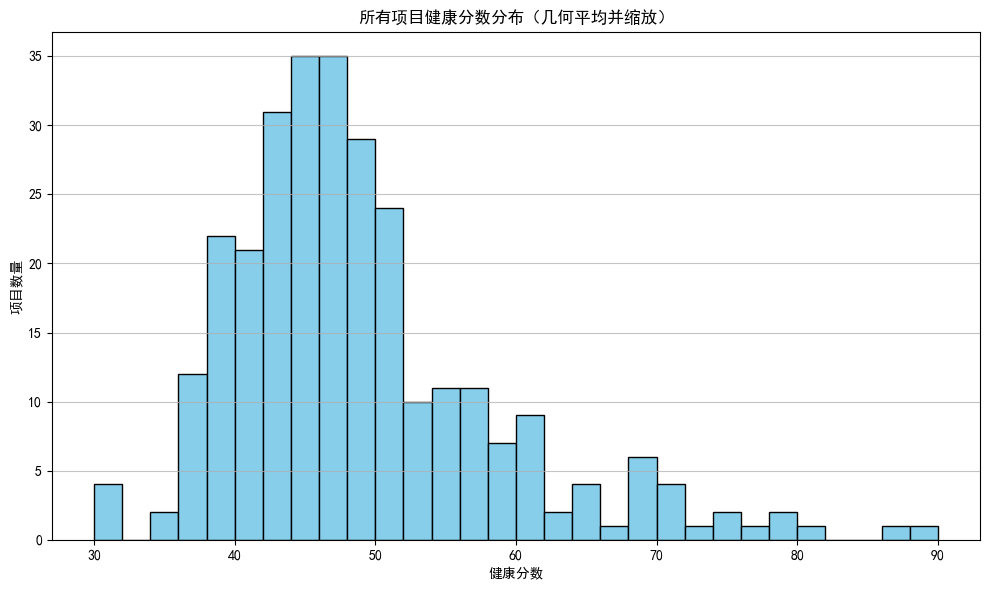


带有健康等级的DataFrame示例:
           Project  Health_Score_Scaled  Health_Level_Class
0   AdguardFilters                40.58                   0
1     Anki-Android                38.43                   0
2              App                45.31                   0
3  AspNetCore.Docs                51.14                   1
4       Barotrauma                36.80                   0

所有项目的健康分数及等级已保存到 'C:\Users\flipp\Desktop\Dase导论\数据集\health_score_full_scaled_geometric_mean_per_project.csv'。


In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 设置保存路径
save_path = r"C:\Users\flipp\Desktop\Dase导论\数据集"

# 定义四个指标的CSV文件路径
activity_file = os.path.join(save_path, 'average_activity_score_per_project.csv')
efficiency_file = os.path.join(save_path, 'development_efficiency_results.csv')
attention_file = os.path.join(save_path, 'attention_scores.csv')
problem_solving_file = os.path.join(save_path, 'problem_solving.csv')

# 检查所有文件是否存在
for file in [activity_file, efficiency_file, attention_file, problem_solving_file]:
    if not os.path.exists(file):
        raise FileNotFoundError(f"未找到文件: {file}")

# 读取CSV文件
activity_df = pd.read_csv(activity_file)
efficiency_df = pd.read_csv(efficiency_file)
attention_df = pd.read_csv(attention_file)
problem_solving_df = pd.read_csv(problem_solving_file)

# 打印列名以确认
print("Activity DataFrame Columns:", activity_df.columns.tolist())
print("Efficiency DataFrame Columns:", efficiency_df.columns.tolist())
print("Attention DataFrame Columns:", attention_df.columns.tolist())
print("Problem Solving DataFrame Columns:", problem_solving_df.columns.tolist())

# 统一列名
# 重命名 Efficiency 和 Problem Solving DataFrame 的 'project' 列为 'Project'
efficiency_df.rename(columns={
    'project': 'Project',
    'efficiency-score': 'Development_Efficiency_Score'
}, inplace=True)

problem_solving_df.rename(columns={
    'project': 'Project',
    'problem_solving-score': 'Problem_Solving_Score'
}, inplace=True)

# 重命名 Attention DataFrame 的 'Attention Score' 列为 'Attention_Score'
attention_df.rename(columns={
    'Attention Score': 'Attention_Score'
}, inplace=True)

# Activity DataFrame 的列名已经正确，无需重命名
# 确保 Activity DataFrame 使用 'Average_Activity_Score'
activity_df.rename(columns={
    'Average_Activity_Score': 'Average_Activity_Score'
}, inplace=True)  # 如果列名已正确，这一步可忽略

# 检查重命名后的列名
print("\n重命名后的列名确认：")
print("Activity DataFrame Columns:", activity_df.columns.tolist())
print("Efficiency DataFrame Columns:", efficiency_df.columns.tolist())
print("Attention DataFrame Columns:", attention_df.columns.tolist())
print("Problem Solving DataFrame Columns:", problem_solving_df.columns.tolist())

# 合并DataFrame
merged_df = activity_df.merge(efficiency_df, on='Project', how='inner') \
                      .merge(attention_df, on='Project', how='inner') \
                      .merge(problem_solving_df, on='Project', how='inner')

# 查看合并后的DataFrame
print("\n合并后的DataFrame示例:")
print(merged_df.head())

# 检查是否有重复的项目名
duplicate_projects = merged_df['Project'].duplicated(keep=False)
print(f"\n存在重复的项目名称: {duplicate_projects.any()}")

if duplicate_projects.any():
    print("正在处理重复的项目名称，确保每个项目名称唯一...")
    
    # 使用 groupby 和 cumcount 为重复项目添加后缀
    merged_df['Project'] = merged_df.groupby('Project').cumcount().astype(str).replace('0', '') + '_' + merged_df['Project']
    
    # 去掉前缀下划线（如果有）
    merged_df['Project'] = merged_df['Project'].str.replace('^_', '', regex=True)
    
    # 再次检查是否有重复的项目名
    if merged_df['Project'].duplicated().any():
        raise ValueError("项目名称仍然存在重复，请检查数据源。")
    else:
        print("重复的项目名称已成功处理。")
else:
    print("所有项目名称均唯一。")

# 提取指标用于健康分数计算
metrics = ['Average_Activity_Score', 'Development_Efficiency_Score', 'Attention_Score', 'Problem_Solving_Score']

# 标准化指标（Min-Max Scaling 到 0-100）
scaler = MinMaxScaler(feature_range=(0, 100))
merged_df_scaled = merged_df.copy()
merged_df_scaled[metrics] = scaler.fit_transform(merged_df[metrics])

# 确认标准化后的指标
print("\n标准化后的指标示例:")
print(merged_df_scaled[metrics].head())

# 处理零值：将所有0替换为一个非常小的正数（如1e-6），以避免几何平均数为零
merged_df_scaled[metrics] = merged_df_scaled[metrics].replace(0, 1e-6)

# 计算几何平均健康分数
merged_df_scaled['Health_Score_Geometric'] = np.power(
    merged_df_scaled['Average_Activity_Score'] *
    merged_df_scaled['Development_Efficiency_Score'] *
    merged_df_scaled['Attention_Score'] *
    merged_df_scaled['Problem_Solving_Score'], 1/4)

# 可选：将健康分数四舍五入到两位小数
merged_df_scaled['Health_Score_Geometric'] = merged_df_scaled['Health_Score_Geometric'].round(2)

# 查看几何平均健康分数结果
print("\n带有几何平均健康分数的DataFrame示例:")
print(merged_df_scaled[['Project', 'Health_Score_Geometric']].head())

# 线性缩放几何平均健康分数到30-90范围
min_gm = merged_df_scaled['Health_Score_Geometric'].min()
max_gm = merged_df_scaled['Health_Score_Geometric'].max()

# 避免分母为零
if max_gm - min_gm == 0:
    merged_df_scaled['Health_Score_Scaled'] = 60  # 中间值
else:
    merged_df_scaled['Health_Score_Scaled'] = 30 + 60 * (merged_df_scaled['Health_Score_Geometric'] - min_gm) / (max_gm - min_gm)

# 四舍五入到两位小数
merged_df_scaled['Health_Score_Scaled'] = merged_df_scaled['Health_Score_Scaled'].round(2)

# 查看缩放后的健康分数
print("\n带有缩放后健康分数的DataFrame示例:")
print(merged_df_scaled[['Project', 'Health_Score_Scaled']].head())

# 保存所有项目的健康分数到CSV
health_score_csv = os.path.join(save_path, 'health_score_scaled_geometric_mean_per_project.csv')
merged_df_scaled[['Project', 'Health_Score_Scaled']].to_csv(health_score_csv, index=False, encoding='utf-8-sig')
print(f"\n所有项目的健康分数已保存到 '{health_score_csv}'。")

# 如果需要，也可以保存按健康分数排序的前10项目
top10_health_score = merged_df_scaled.sort_values(by='Health_Score_Scaled', ascending=False).head(10)
top10_health_score_csv = os.path.join(save_path, 'top10_health_score_scaled_geometric_mean_per_project.csv')
top10_health_score.to_csv(top10_health_score_csv, index=False, encoding='utf-8-sig')
print(f"前10个项目的健康分数已保存到 '{top10_health_score_csv}'。")

# 可选：绘制健康分数的分布图
plt.figure(figsize=(10, 6))
plt.hist(merged_df_scaled['Health_Score_Scaled'], bins=30, color='skyblue', edgecolor='black')
plt.title('所有项目健康分数分布（几何平均并缩放）')
plt.xlabel('健康分数')
plt.ylabel('项目数量')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# 保存分布图
health_score_distribution_png = os.path.join(save_path, 'health_score_distribution_scaled_geometric_mean.png')
plt.savefig(health_score_distribution_png, dpi=300)
print(f"健康分数分布图已保存为 '{health_score_distribution_png}'。")

plt.show()

# ######################### 新增部分开始 ############################

# 定义分类函数，根据健康分数划分等级
def classify_health_level(score):
    if score <= 50:
        return 0  # 低
    elif score <= 70:
        return 1  # 中
    else:
        return 2  # 高

merged_df_scaled['Health_Level_Class'] = merged_df_scaled['Health_Score_Scaled'].apply(classify_health_level)

# 可选：查看分类结果
print("\n带有健康等级的DataFrame示例:")
print(merged_df_scaled[['Project', 'Health_Score_Scaled', 'Health_Level_Class']].head())

# 保存带有健康分数的完整DataFrame到CSV
health_score_full_csv = os.path.join(save_path, 'health_score_full_scaled_geometric_mean_per_project.csv')
merged_df_scaled[['Project', 'Health_Score_Scaled', 'Health_Level_Class']].to_csv(health_score_full_csv, index=False, encoding='utf-8-sig')
print(f"\n所有项目的健康分数及等级已保存到 '{health_score_full_csv}'。")

# ######################### 新增部分结束 ############################


In [35]:
import pandas as pd
import numpy as np
import os

def detect_three_years_decline(
    df_attention_path,
    df_activity_path,
    output_anomalies_path
):
    """
    从两个CSV（yearly_attention_scores、all_projects_activity_score_long）读取数据，
    检测“活跃度分数和参与度分数 连续三年都在下降，且每年分数下降率达到10%”的项目，
    并计算异常指数，输出到 CSV。
    """
    # 1. 读取 CSV
    df_attention = pd.read_csv(df_attention_path)
    df_activity = pd.read_csv(df_activity_path)

    # ---- 重命名列，确保一致 (如果你的CSV本身就是小写，就可省略) ----
    # 注意：如果你的CSV里列名不同，这里请自行修改
    df_attention.rename(columns={
        "Project": "project",
        "Year": "year",
        "Attention Score": "attention_score",  # 如果CSV里已是attention_score就不用改
    }, inplace=True)

    df_activity.rename(columns={
        "Project": "project",
        "Year": "year",
        "Activity_Score": "activity_score",    # 如果CSV里已是activity_score就不用改
    }, inplace=True)

    # 2. 合并 => 得到 (project, year, attention_score, activity_score)
    df_merged = pd.merge(
        df_attention,
        df_activity,
        on=['project','year'],   # 以项目与年份为匹配键
        how='inner'
    )

    # 确保年份可排序
    df_merged['year'] = pd.to_numeric(df_merged['year'], errors='coerce')
    df_merged.dropna(subset=['year'], inplace=True)
    df_merged['year'] = df_merged['year'].astype(int)

    # 3. 对每个项目按年份排序
    df_merged.sort_values(by=['project','year'], inplace=True)

    # 4. 分组并计算：连续三年下降 + 每年降幅 >= 10%
    def check_decline_and_index(group):
        """
        group 是同一个项目的数据，已按 year 排序。
        寻找 (year_i, year_i+1, year_i+2) 两个相邻年度差，
        要求：
           - attention_score 连续两年下降 >= 10%
           - activity_score 连续两年下降 >= 10%
        """
        group = group.reset_index(drop=True)
        anomalies = []
        
        # 定义一个小函数，判断“是否下降 >= 10%”
        def is_decline_30pct_ormore(old_val, new_val, threshold=0.1):
            # 若 old_val <= 0，则直接认为不成立，或根据需求另行处理
            if old_val <= 0:
                return False
            ratio = (new_val - old_val) / old_val
            return ratio <= -threshold

        # 这里假定有 n 行数据 => 可形成 (n-2) 个 "三年" 窗口
        for i in range(len(group) - 2):
            row_current   = group.iloc[i]
            row_next      = group.iloc[i+1]
            row_next_next = group.iloc[i+2]

            # 第1→2年
            attention_decline_1 = is_decline_30pct_ormore(row_current['attention_score'], row_next['attention_score'])
            activity_decline_1  = is_decline_30pct_ormore(row_current['activity_score'], row_next['activity_score'])
            # 第2→3年
            attention_decline_2 = is_decline_30pct_ormore(row_next['attention_score'], row_next_next['attention_score'])
            activity_decline_2  = is_decline_30pct_ormore(row_next['activity_score'], row_next_next['activity_score'])

            # 若 attention、activity 都在两个相邻区间满足“下降>=10%”
            if (attention_decline_1 and attention_decline_2
                and activity_decline_1 and activity_decline_2):
                
                # 说明三年连续下降，且降幅>=10%
                # 这里仅作示例：危机指数 = 第1年的值 - 第3年的值（若为负值则取0）
                attention_drop = row_current['attention_score'] - row_next_next['attention_score']
                activity_drop  = row_current['activity_score']  - row_next_next['activity_score']
                # 避免出现负数，或可改为绝对值
                if attention_drop < 0:
                    attention_drop = 0
                if activity_drop < 0:
                    activity_drop = 0
                crisis_index = attention_drop + activity_drop

                anomalies.append({
                    'project': row_current['project'],
                    'start_year': row_current['year'],
                    'mid_year': row_next['year'],
                    'end_year': row_next_next['year'],
                    'crisis_index': crisis_index
                })

        # 关键：如果没有记录，就返回一个空的 DataFrame，但包含所需列
        if anomalies:
            return pd.DataFrame(anomalies)
        else:
            # 保证列名一致
            return pd.DataFrame(columns=['project', 'start_year', 'mid_year', 'end_year', 'crisis_index'])

    df_anomalies = df_merged.groupby('project', group_keys=True).apply(check_decline_and_index)
    df_anomalies.reset_index(drop=True, inplace=True)

    # 如果完全没有项目产生异常，这里 df_anomalies 依然是空，但至少包含对应列
    if df_anomalies.empty:
        print("\n没有任何项目满足：连续三年都下降，且每年降幅>=10% 的条件。")
        print("结果为空 DataFrame。")
        # 可以直接保存空表
        df_anomalies.to_csv(output_anomalies_path, index=False, encoding='utf-8-sig')
        return

    # 否则，正常进行后续操作
    df_anomalies_max = df_anomalies.sort_values('crisis_index', ascending=False).groupby('project').head(1)

    # 5. 保存结果
    df_anomalies_max.to_csv(output_anomalies_path, index=False, encoding='utf-8-sig')
    print(f"\n异常项目已保存到: {output_anomalies_path}")
    print(df_anomalies_max)


if __name__ == "__main__":
    # ---------------- 使用示例 ----------------
    attention_csv = r"C:\Users\flipp\Desktop\Dase导论\数据集\yearly_attention_scores.csv"
    activity_csv = r"C:\Users\flipp\Desktop\Dase导论\数据集\all_projects_activity_score_long.csv"
    anomalies_csv = r"C:\Users\flipp\Desktop\Dase导论\数据集\anomalies_projects.csv"

    detect_three_years_decline(
        df_attention_path=attention_csv,
        df_activity_path=activity_csv,
        output_anomalies_path=anomalies_csv
    )



异常项目已保存到: C:\Users\flipp\Desktop\Dase导论\数据集\anomalies_projects.csv
                  project start_year mid_year end_year  crisis_index
9                 bitcoin       2021     2022     2023   7674.836899
22                 opencv       2020     2021     2022   4826.593029
26             tensorflow       2020     2021     2022   4253.297092
8                  assets       2021     2022     2023   3823.549647
27               terminal       2020     2021     2022   3704.687338
18                 gatsby       2020     2021     2022   3521.654876
6                 angular       2020     2021     2022   3372.939035
15          elasticsearch       2021     2022     2023   3305.037433
19              lightning       2021     2022     2023   2487.477228
21                   o3de       2021     2022     2023   2257.899692
10                   ccxt       2018     2019     2020   2095.070758
24           react-native       2019     2020     2021   2021.953541
7                 ansible       201

C:\Users\flipp\AppData\Local\Temp\ipykernel_20376\487904052.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_anomalies = df_merged.groupby('project', group_keys=True).apply(check_decline_and_index)
